|Name|ID|Kaggle User Name|
|------------|------- |------- |
|Johney Jijin|18032679|@jijinsas
|Jamie Scott |18041508|@jamiescott|

## Google Analytics Customer Revenue Prediction<a class="tocSkip">
## 158.333 Assignment 3 - S2, 2019 - Part 1<a class="tocSkip">

In [1]:
from IPython.core.display import display, HTML, Markdown as md
display(HTML("""<style>.container { width:100% !important; } p, ul {max-width: 40em;} .rendered_html table { margin-left: 0; } .output_subarea.output_png { display: flex; justify-content: center;}</style>"""))

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports-and-Defaults" data-toc-modified-id="Imports-and-Defaults-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports and Defaults</a></span></li><li><span><a href="#Strategies-for-Handling-Big(ish)-Data" data-toc-modified-id="Strategies-for-Handling-Big(ish)-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Strategies for Handling Big(ish) Data</a></span><ul class="toc-item"><li><span><a href="#Loading-Data" data-toc-modified-id="Loading-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Loading Data</a></span></li><li><span><a href="#Sampling-Dask-DataFrame" data-toc-modified-id="Sampling-Dask-DataFrame-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Sampling Dask DataFrame</a></span></li></ul></li><li><span><a href="#Wrangling" data-toc-modified-id="Wrangling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Wrangling</a></span><ul class="toc-item"><li><span><a href="#Flattening-JSON-Data" data-toc-modified-id="Flattening-JSON-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Flattening JSON Data</a></span></li><li><span><a href="#Formatting-the-flattened-data" data-toc-modified-id="Formatting-the-flattened-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Formatting the flattened data</a></span></li></ul></li><li><span><a href="#Chunking" data-toc-modified-id="Chunking-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Chunking</a></span></li><li><span><a href="#Re-sampling-the-new-dataframe" data-toc-modified-id="Re-sampling-the-new-dataframe-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Re-sampling the new dataframe</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Chi-squared-analysis" data-toc-modified-id="Chi-squared-analysis-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Chi-squared analysis</a></span></li><li><span><a href="#Correlation-Analysis" data-toc-modified-id="Correlation-Analysis-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Correlation Analysis</a></span><ul class="toc-item"><li><span><a href="#Correlation-Comparison" data-toc-modified-id="Correlation-Comparison-7.2.1"><span class="toc-item-num">7.2.1&nbsp;&nbsp;</span>Correlation Comparison</a></span></li></ul></li><li><span><a href="#Visual-Exploration" data-toc-modified-id="Visual-Exploration-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Visual Exploration</a></span></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#First-phase" data-toc-modified-id="First-phase-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>First phase</a></span></li><li><span><a href="#Second-phase" data-toc-modified-id="Second-phase-8.2"><span class="toc-item-num">8.2&nbsp;&nbsp;</span>Second phase</a></span></li></ul></li><li><span><a href="#Applying-full-process-to-both-datasets" data-toc-modified-id="Applying-full-process-to-both-datasets-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Applying full process to both datasets</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Building-Models" data-toc-modified-id="Building-Models-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Building Models</a></span><ul class="toc-item"><li><span><a href="#Classifiers" data-toc-modified-id="Classifiers-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Classifiers</a></span></li><li><span><a href="#Random-Forest-Regression" data-toc-modified-id="Random-Forest-Regression-11.2"><span class="toc-item-num">11.2&nbsp;&nbsp;</span>Random Forest Regression</a></span></li></ul></li><li><span><a href="#Appendix-1---First-Submission" data-toc-modified-id="Appendix-1---First-Submission-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Appendix 1 - First Submission</a></span></li></ul></div>

## Introduction

In this assignment, we were charged with predicting revenue per customer at a Google Merchandise Store. Making the challenge a little more complicated was the size of the dataset (23 GB for the training data, 7GB for the test data) which meant we needed robust strategies for working with the data either locally or on the Massey University cluster via Zeppelin, Hive and Hadoop.

We would eventually build models that incorporated three key elements: predictions of visits (rows) would likely result in a purchase, a regression to predict the amount of transaction and the inclusion of features in our wider set that reflected seasonality. Our final model predicts log of total transaction amount with a root mean squared error of 0.88.

## Imports and Defaults

In [2]:
import pandas as pd
import numpy as np
import datetime as dt

import dask.dataframe as dd
from dask.diagnostics import ProgressBar
import json
from pandas.io.json import json_normalize

# from sklearn import preprocessing
# from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

from sklearn.metrics import mean_squared_error
import researchpy as rp #for chi-squared test
from sklearn.utils import resample #for over- and under-sampling
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_regression, chi2

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pylab import rcParams
from plotly.subplots import make_subplots
import plotly.graph_objects as go

%matplotlib inline
rcParams['figure.figsize'] = 15, 10
rcParams['axes.titlesize'] = 20
rcParams['axes.labelsize'] = 'large'
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 18

sns.set_style('darkgrid')
pd.set_option('max_columns', 100)
pd.set_option('max_rows', 20)

In [5]:
import TeamFunctionsA3 as my

In [3]:
import sys,os,os.path #for kaggle api set-up

os.environ['KAGGLE_USERNAME'] = "jamiescott"
os.environ['KAGGLE_KEY'] = "ff5e128d31c1e6d1a44234cb78721da3"

In [4]:
from kaggle.api.kaggle_api_extended import KaggleApi 

# from kaggle.api.kaggle_api_extended import KaggleApi 
api = KaggleApi()

In [5]:
from ipython_memwatcher import MemWatcher
mw = MemWatcher()
mw.start_watching_memory()

In [5] used 0.012 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 126.691 MiB


## Strategies for Handling Big(ish) Data

With the train and test data sets measuring 23GB and 7GB respectively, strategies for working with the training data especially were fundamental to being able to produce suitable solutions.

Dask, sampling, and chunking were the three pillars of our big data strategy locally, before moving to the cluster for aspects of the project that required larger memory and processing power.

Keeping the data initially on the local machine, we loaded the entire training data into a Dask dataframe then sampled that to obtain a representative portion to work out what initial wrangling was required.

We applied that wrangling process to the test data and to the training data chunk by chunk which not only enabled us to wrangle the entire dataframe with a consistent approach but also, when these wrangled chunks were joined back together, reduced the file size by 98% down to 0.5GB.

We then sampled the new formatted dataframe (with a larger sample size) to do a more thorough EDA and inform our decisions about what additional wrangling was needed, and then construct models.

### Loading Data

In [7]:
#!kaggle competitions download ga-customer-revenue-prediction -p '../datasets'

100%|█████████████████████████████████████▉| 1.33G/1.33G [02:28<00:00, 14.3MB/s]
100%|██████████████████████████████████████| 1.33G/1.33G [02:28<00:00, 9.67MB/s]
In [7] used -38.520 MiB RAM in 151.210s, peaked 39.109 MiB above current, total RAM usage 57.324 MiB


In [208]:
#defining the four columns that are in JSON format to make import more efficient 
JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [208] used 0.039 MiB RAM in 0.000s, peaked 0.000 MiB above current, total RAM usage 2192.180 MiB


In [18]:
#loading the entire dataset into a dask dataframe
train_data_ddf = dd.read_csv('../datasets/train_v2.csv', infer_datetime_format=True, parse_dates=['date'], dtype={'fullVisitorId': 'str'},
                             converters={column: json.loads for column in JSON_COLUMNS})

In [18] used 6.098 MiB RAM in 0.360s, peaked 0.000 MiB above current, total RAM usage 176.508 MiB
In [18] used 6.098 MiB RAM in 0.462s, peaked 0.000 MiB above current, total RAM usage 176.508 MiB


In [209]:
test_data = pd.read_csv('../datasets/test_v2.csv', infer_datetime_format=True, parse_dates=['date'], dtype={'fullVisitorId': 'str'},
                             converters={column: json.loads for column in JSON_COLUMNS})

In [209] used 835.164 MiB RAM in 78.636s, peaked 1398.422 MiB above current, total RAM usage 3026.578 MiB


In [20]:
train_data_ddf.dtypes

channelGrouping                 object
customDimensions                object
date                    datetime64[ns]
device                          object
fullVisitorId                   object
geoNetwork                      object
hits                            object
socialEngagementType            object
totals                          object
trafficSource                   object
visitId                          int64
visitNumber                      int64
visitStartTime                   int64
dtype: object

In [20] used 0.160 MiB RAM in 0.004s, peaked 0.000 MiB above current, total RAM usage 2914.141 MiB
In [20] used 0.156 MiB RAM in 0.108s, peaked 0.000 MiB above current, total RAM usage 2914.145 MiB


In [21]:
train_data_ddf.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 13 entries, channelGrouping to visitStartTime
dtypes: datetime64[ns](1), object(9), int64(3)In [21] used 0.070 MiB RAM in 0.004s, peaked 0.000 MiB above current, total RAM usage 2911.742 MiB
In [21] used 0.070 MiB RAM in 0.105s, peaked 0.000 MiB above current, total RAM usage 2911.746 MiB


In [34]:
test_data_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401589 entries, 0 to 401588
Data columns (total 59 columns):
channelGrouping                                      401589 non-null object
customDimensions                                     401589 non-null object
date                                                 401589 non-null datetime64[ns]
fullVisitorId                                        401589 non-null object
hits                                                 401589 non-null object
socialEngagementType                                 401589 non-null object
visitId                                              401589 non-null int64
visitNumber                                          401589 non-null int64
visitStartTime                                       401589 non-null int64
device_browser                                       401589 non-null object
device_browserSize                                   401589 non-null object
device_browserVersion                           

In [22]:
with ProgressBar():
    print("length of df is ", len(train_data_ddf))

[########################################] | 100% Completed |  3min 25.3s
length of df is  1708337
In [22] used -154.582 MiB RAM in 205.620s, peaked 2143.578 MiB above current, total RAM usage 2757.316 MiB
In [22] used -154.578 MiB RAM in 205.722s, peaked 2143.574 MiB above current, total RAM usage 2757.320 MiB


### Sampling Dask DataFrame 

As the size of the train data (1.7M rows, 23GB) is too large to handle in RAM, we took a sample from our dask dataframe as a basis to explore the data and determine what wrangling was required.

By sampling rather than chunking at this point, the data we work with is more likely to be representative of the entire dataframe.

In [23]:
# defining the sample in dask
with ProgressBar():
    sample = train_data_ddf.sample(frac=0.02, random_state=8)

In [23] used 1.246 MiB RAM in 0.011s, peaked 0.000 MiB above current, total RAM usage 2758.426 MiB
In [23] used 1.250 MiB RAM in 0.115s, peaked 0.000 MiB above current, total RAM usage 2758.430 MiB


In [24]:
len(sample)

34174

In [24] used -47.109 MiB RAM in 255.744s, peaked 1384.418 MiB above current, total RAM usage 2711.398 MiB
In [24] used -47.109 MiB RAM in 255.845s, peaked 1396.355 MiB above current, total RAM usage 2711.398 MiB


In [25]:
sample.head()

channelGrouping                              customDimensions       date  \
1585  Organic Search                                            [] 2017-10-16   
2947         Display  [{'index': '4', 'value': 'Central America'}] 2017-10-16   
251         Referral    [{'index': '4', 'value': 'North America'}] 2017-10-16   
1129  Organic Search             [{'index': '4', 'value': 'APAC'}] 2017-10-16   
66    Organic Search                                            [] 2017-10-16   

                                                 device        fullVisitorId  \
1585  {'browser': 'Chrome', 'browserVersion': 'not a...  9323158324778204992   
2947  {'browser': 'Chrome', 'browserVersion': 'not a...  6910786574567943266   
251   {'browser': 'Chrome', 'browserVersion': 'not a...  0414992497318287346   
1129  {'browser': 'Chrome', 'browserVersion': 'not a...  4730951574397855874   
66    {'browser': 'Chrome', 'browserVersion': 'not a...  1858204879892046296   

                                             geoNetwork  \
1585  {'continent': 'Asia', 'subContinent': 'Souther...   
2947  {'continent': 'Americas', 'subContinent': 'Cen...   
251   {'continent': 'Americas', 'subContinent': 'Nor...   
1129  {'continent': 'Asia', 'subContinent': 'Eastern...   
66    {'continent': 'Europe', 'subContinent': 'North...   

                                                   hits  socialEngagementType  \
1585  [{'hitNumber': '1', 'time': '0', 'hour': '10',...  Not Socially Engaged   
2947  [{'hitNumber': '1', 'time': '0', 'hour': '23',...  Not Socially Engaged   
251   [{'hitNumber': '1', 'time': '0', 'hour': '10',...  Not Socially Engaged   
1129  [{'hitNumber': '1', 'time': '0', 'hour': '7', ...  Not Socially Engaged   
66    [{'hitNumber': '1', 'time': '0', 'hour': '4', ...  Not Socially Engaged   

                                                 totals  \
1585  {'visits': '1', 'hits': '1', 'pageviews': '1',...   
2947  {'visits': '1', 'hits': '1', 'pageviews': '1',...   
251   {'visits': '1', 'hits': '6', 'pageviews': '5',...   
1129  {'visits': '1', 'hits': '2', 'pageviews': '2',...   
66    {'visits': '1', 'hits': '3', 'pageviews': '3',...   

                                          trafficSource     visitId  \
1585  {'campaign': '(not set)', 'source': 'google', ...  1508175557   
2947  {'campaign': '1000557 | GA | US | en | Hybrid ...  1508220643   
251   {'referralPath': '/', 'campaign': '(not set)',...  1508176679   
1129  {'campaign': '(not set)', 'source': 'google', ...  1508163214   
66    {'campaign': '(not set)', 'source': 'google', ...  1508152383   

      visitNumber  visitStartTime  
1585            1      1508175557  
2947            1      1508220643  
251             5      1508176679  
1129            1      1508163214  
66              1      1508152383

In [25] used 0.676 MiB RAM in 0.782s, peaked 220.418 MiB above current, total RAM usage 2712.207 MiB
In [25] used 0.676 MiB RAM in 0.886s, peaked 220.383 MiB above current, total RAM usage 2712.207 MiB


In [26]:
#converting sample to a pandas df
with ProgressBar():
    train_sample = sample.compute()

[########################################] | 100% Completed |  4min 35.9s
In [26] used -466.129 MiB RAM in 276.586s, peaked 1880.270 MiB above current, total RAM usage 2246.027 MiB
In [26] used -466.133 MiB RAM in 276.687s, peaked 1880.770 MiB above current, total RAM usage 2246.027 MiB


In [27]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34174 entries, 1585 to 104
Data columns (total 13 columns):
channelGrouping         34174 non-null object
customDimensions        34174 non-null object
date                    34174 non-null datetime64[ns]
device                  34174 non-null object
fullVisitorId           34174 non-null object
geoNetwork              34174 non-null object
hits                    34174 non-null object
socialEngagementType    34174 non-null object
totals                  34174 non-null object
trafficSource           34174 non-null object
visitId                 34174 non-null int64
visitNumber             34174 non-null int64
visitStartTime          34174 non-null int64
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 3.7+ MB
In [27] used 5.055 MiB RAM in 0.094s, peaked 0.000 MiB above current, total RAM usage 2251.535 MiB
In [27] used 5.055 MiB RAM in 0.196s, peaked 0.000 MiB above current, total RAM usage 2251.535 MiB


In [28]:
train_sample.head()

channelGrouping                              customDimensions       date  \
1585  Organic Search                                            [] 2017-10-16   
2947         Display  [{'index': '4', 'value': 'Central America'}] 2017-10-16   
251         Referral    [{'index': '4', 'value': 'North America'}] 2017-10-16   
1129  Organic Search             [{'index': '4', 'value': 'APAC'}] 2017-10-16   
66    Organic Search                                            [] 2017-10-16   

                                                 device        fullVisitorId  \
1585  {'browser': 'Chrome', 'browserVersion': 'not a...  9323158324778204992   
2947  {'browser': 'Chrome', 'browserVersion': 'not a...  6910786574567943266   
251   {'browser': 'Chrome', 'browserVersion': 'not a...  0414992497318287346   
1129  {'browser': 'Chrome', 'browserVersion': 'not a...  4730951574397855874   
66    {'browser': 'Chrome', 'browserVersion': 'not a...  1858204879892046296   

                                             geoNetwork  \
1585  {'continent': 'Asia', 'subContinent': 'Souther...   
2947  {'continent': 'Americas', 'subContinent': 'Cen...   
251   {'continent': 'Americas', 'subContinent': 'Nor...   
1129  {'continent': 'Asia', 'subContinent': 'Eastern...   
66    {'continent': 'Europe', 'subContinent': 'North...   

                                                   hits  socialEngagementType  \
1585  [{'hitNumber': '1', 'time': '0', 'hour': '10',...  Not Socially Engaged   
2947  [{'hitNumber': '1', 'time': '0', 'hour': '23',...  Not Socially Engaged   
251   [{'hitNumber': '1', 'time': '0', 'hour': '10',...  Not Socially Engaged   
1129  [{'hitNumber': '1', 'time': '0', 'hour': '7', ...  Not Socially Engaged   
66    [{'hitNumber': '1', 'time': '0', 'hour': '4', ...  Not Socially Engaged   

                                                 totals  \
1585  {'visits': '1', 'hits': '1', 'pageviews': '1',...   
2947  {'visits': '1', 'hits': '1', 'pageviews': '1',...   
251   {'visits': '1', 'hits': '6', 'pageviews': '5',...   
1129  {'visits': '1', 'hits': '2', 'pageviews': '2',...   
66    {'visits': '1', 'hits': '3', 'pageviews': '3',...   

                                          trafficSource     visitId  \
1585  {'campaign': '(not set)', 'source': 'google', ...  1508175557   
2947  {'campaign': '1000557 | GA | US | en | Hybrid ...  1508220643   
251   {'referralPath': '/', 'campaign': '(not set)',...  1508176679   
1129  {'campaign': '(not set)', 'source': 'google', ...  1508163214   
66    {'campaign': '(not set)', 'source': 'google', ...  1508152383   

      visitNumber  visitStartTime  
1585            1      1508175557  
2947            1      1508220643  
251             5      1508176679  
1129            1      1508163214  
66              1      1508152383

In [28] used 0.027 MiB RAM in 0.028s, peaked 0.000 MiB above current, total RAM usage 2251.598 MiB
In [28] used 0.027 MiB RAM in 0.130s, peaked 0.000 MiB above current, total RAM usage 2251.598 MiB


## Wrangling

### Flattening JSON Data

Flattening the columns with JSON data was the first priority as it contained the data we were trying to predict and potentially a range of other useful features. 

In [213]:
test_data = my.flatten_JSON(test_data)
train_sample = my.flatten_JSON(train_sample)

In [213] used 1783.172 MiB RAM in 49.971s, peaked 974.879 MiB above current, total RAM usage 4814.203 MiB


In [32]:
train_sample.head()

channelGrouping                            customDimensions       date  \
0          Direct  [{'index': '4', 'value': 'North America'}] 2017-05-01   
0  Organic Search  [{'index': '4', 'value': 'North America'}] 2017-06-30   
0          Direct  [{'index': '4', 'value': 'North America'}] 2017-04-28   
0      Affiliates                                          [] 2016-09-01   
0        Referral  [{'index': '4', 'value': 'North America'}] 2016-12-01   

         fullVisitorId                                               hits  \
0  9026840718082010040  [{'hitNumber': '2', 'time': '0', 'hour': '12',...   
0  6911303723241317741  [{'hitNumber': '1', 'time': '0', 'hour': '16',...   
0  1759779356678951325  [{'hitNumber': '1', 'time': '0', 'hour': '9', ...   
0  4283803608680112061  [{'hitNumber': '1', 'time': '0', 'hour': '22',...   
0  2358335954224036149  [{'hitNumber': '1', 'time': '0', 'hour': '8', ...   

   socialEngagementType     visitId  visitNumber  visitStartTime  \
0  Not Socially Engaged  1493666705            1      1493666708   
0  Not Socially Engaged  1498864323            1      1498864323   
0  Not Socially Engaged  1493396619           24      1493396619   
0  Not Socially Engaged  1472794892            1      1472794892   
0  Not Socially Engaged  1480608841            4      1480608841   

  device_browser             device_browserSize  \
0         Chrome  not available in demo dataset   
0         Chrome  not available in demo dataset   
0         Chrome  not available in demo dataset   
0         Chrome  not available in demo dataset   
0         Chrome  not available in demo dataset   

           device_browserVersion device_deviceCategory  \
0  not available in demo dataset               desktop   
0  not available in demo dataset               desktop   
0  not available in demo dataset               desktop   
0  not available in demo dataset               desktop   
0  not available in demo dataset               desktop   

             device_flashVersion  device_isMobile  \
0  not available in demo dataset            False   
0  not available in demo dataset            False   
0  not available in demo dataset            False   
0  not available in demo dataset            False   
0  not available in demo dataset            False   

                 device_language    device_mobileDeviceBranding  \
0  not available in demo dataset  not available in demo dataset   
0  not available in demo dataset  not available in demo dataset   
0  not available in demo dataset  not available in demo dataset   
0  not available in demo dataset  not available in demo dataset   
0  not available in demo dataset  not available in demo dataset   

         device_mobileDeviceInfo device_mobileDeviceMarketingName  \
0  not available in demo dataset    not available in demo dataset   
0  not available in demo dataset    not available in demo dataset   
0  not available in demo dataset    not available in demo dataset   
0  not available in demo dataset    not available in demo dataset   
0  not available in demo dataset    not available in demo dataset   

        device_mobileDeviceModel     device_mobileInputSelector  \
0  not available in demo dataset  not available in demo dataset   
0  not available in demo dataset  not available in demo dataset   
0  not available in demo dataset  not available in demo dataset   
0  not available in demo dataset  not available in demo dataset   
0  not available in demo dataset  not available in demo dataset   

  device_operatingSystem  device_operatingSystemVersion  \
0                Windows  not available in demo dataset   
0                Windows  not available in demo dataset   
0                Windows  not available in demo dataset   
0                Windows  not available in demo dataset   
0                Windows  not available in demo dataset   

             device_screenColors        device_screenResolution  \
0  not available in demo dataset  not available in demo

In [32] used 0.000 MiB RAM in 0.036s, peaked 0.000 MiB above current, total RAM usage 4955.750 MiB
In [32] used 0.000 MiB RAM in 0.140s, peaked 0.000 MiB above current, total RAM usage 4955.750 MiB


In [33]:
train_sample.shape

(34174, 59)

In [33] used 0.000 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 4955.770 MiB
In [33] used 0.000 MiB RAM in 0.102s, peaked 0.000 MiB above current, total RAM usage 4955.770 MiB


In [31]:
test_data.head()

channelGrouping                            customDimensions       date  \
0  Organic Search           [{'index': '4', 'value': 'APAC'}] 2018-05-11   
1          Direct  [{'index': '4', 'value': 'North America'}] 2018-05-11   
2  Organic Search  [{'index': '4', 'value': 'North America'}] 2018-05-11   
3          Direct  [{'index': '4', 'value': 'North America'}] 2018-05-11   
4  Organic Search  [{'index': '4', 'value': 'North America'}] 2018-05-11   

         fullVisitorId                                               hits  \
0  7460955084541987166  [{'hitNumber': '1', 'time': '0', 'hour': '21',...   
1   460252456180441002  [{'hitNumber': '1', 'time': '0', 'hour': '11',...   
2  3461808543879602873  [{'hitNumber': '1', 'time': '0', 'hour': '12',...   
3   975129477712150630  [{'hitNumber': '1', 'time': '0', 'hour': '23',...   
4  8381672768065729990  [{'hitNumber': '1', 'time': '0', 'hour': '10',...   

   socialEngagementType     visitId  visitNumber  visitStartTime  \
0  Not Socially Engaged  1526099341            2      1526099341   
1  Not Socially Engaged  1526064483          166      1526064483   
2  Not Socially Engaged  1526067157            2      1526067157   
3  Not Socially Engaged  1526107551            4      1526107551   
4  Not Socially Engaged  1526060254            1      1526060254   

      device_browser             device_browserSize  \
0             Chrome  not available in demo dataset   
1             Chrome  not available in demo dataset   
2             Chrome  not available in demo dataset   
3             Chrome  not available in demo dataset   
4  Internet Explorer  not available in demo dataset   

           device_browserVersion device_deviceCategory  \
0  not available in demo dataset                mobile   
1  not available in demo dataset               desktop   
2  not available in demo dataset               desktop   
3  not available in demo dataset                mobile   
4  not available in demo dataset                tablet   

             device_flashVersion  device_isMobile  \
0  not available in demo dataset             True   
1  not available in demo dataset            False   
2  not available in demo dataset            False   
3  not available in demo dataset             True   
4  not available in demo dataset             True   

                 device_language    device_mobileDeviceBranding  \
0  not available in demo dataset  not available in demo dataset   
1  not available in demo dataset  not available in demo dataset   
2  not available in demo dataset  not available in demo dataset   
3  not available in demo dataset  not available in demo dataset   
4  not available in demo dataset  not available in demo dataset   

         device_mobileDeviceInfo device_mobileDeviceMarketingName  \
0  not available in demo dataset    not available in demo dataset   
1  not available in demo dataset    not available in demo dataset   
2  not available in demo dataset    not available in demo dataset   
3  not available in demo dataset    not available in demo dataset   
4  not available in demo dataset    not available in demo dataset   

        device_mobileDeviceModel     device_mobileInputSelector  \
0  not available in demo dataset  not available in demo dataset   
1  not available in demo dataset  not available in demo dataset   
2  not available in demo dataset  not available in demo dataset   
3  not available in demo dataset  not available in demo dataset   
4  not available in demo dataset  not available in demo dataset   

  device_operatingSystem  device_operatingSystemVersion  \
0                Android  not available in demo dataset   
1              Macintosh  not available in demo dataset   
2              Chrome OS  not available in demo dataset   
3                    iOS  not available in demo dataset   
4                Windows  not available in demo dataset   

             device_screenColors        device_screenResolution  \
0  not available in demo datase

In [31] used 0.004 MiB RAM in 0.048s, peaked 0.000 MiB above current, total RAM usage 4955.727 MiB
In [31] used 0.004 MiB RAM in 0.149s, peaked 0.000 MiB above current, total RAM usage 4955.727 MiB


In [214]:
test_data.shape

(401589, 59)

In [214] used -0.957 MiB RAM in 0.008s, peaked 0.957 MiB above current, total RAM usage 4891.363 MiB


### Formatting the flattened data

With newly flattened columns of data to work with, we set about wrangling them into a workable format.

First we checked that the same columns existed in the train and test dataset, and identified which columns contained the same value (and no NaNs) as they would have no predictive value and could be deleted.

Inspection of the data also led us to define which columns needed filling with the appropriate null, zero or bool values.

We also extracted various date or time components from the date and visitstarttime columns.

New features based on transactions were created - a log of total revenue as well as a binary feature indicating whether or not a purchase was made. This would be later used to train classifer models.

It is worth noting that we decided to delete the original 'hits' column initially and look to build a solution without it. We could extract some of the data it contained (e.g. hour etc) from other fields and putting it to one side allowed us to produce a datafame that was of a manageable size to process locally.

In [36]:
columns_not_in_test = list(col for col in train_sample.columns if col not in test_data.columns)
columns_not_in_train = list(col for col in test_data.columns if col not in train_sample.columns)
print(len(columns_not_in_test))
print(len(columns_not_in_train))

#both lists are empty therefore no columns exist in one of our respective databases and not the other

0
0
In [36] used 0.016 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 5190.059 MiB
In [36] used 0.020 MiB RAM in 0.104s, peaked 0.000 MiB above current, total RAM usage 5190.062 MiB


In [37]:
#find columns that have only one unique value and no NaNs
single_value_no_NaNs = list(col for col in train_sample.columns if train_sample[col].nunique() == 1 and train_sample[col].isna().sum()==0)
single_value_no_NaNs

['socialEngagementType',
 'device_browserSize',
 'device_browserVersion',
 'device_flashVersion',
 'device_language',
 'device_mobileDeviceBranding',
 'device_mobileDeviceInfo',
 'device_mobileDeviceMarketingName',
 'device_mobileDeviceModel',
 'device_mobileInputSelector',
 'device_operatingSystemVersion',
 'device_screenColors',
 'device_screenResolution',
 'geoNetwork_cityId',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'geoNetwork_networkLocation',
 'totals_visits',
 'trafficSource_adwordsClickInfo.criteriaParameters']

In [37] used 47.762 MiB RAM in 2.959s, peaked 19.098 MiB above current, total RAM usage 5237.836 MiB
In [37] used 47.762 MiB RAM in 3.061s, peaked 19.742 MiB above current, total RAM usage 5237.836 MiB


In [ ]:
train_sample = my.format_cols(train_sample)
test_data  = my.format_cols(test_data)

In [44]:
train_sample.head()

channelGrouping customDimensions       date        fullVisitorId  \
0          Direct    North America 2017-05-01  9026840718082010040   
0  Organic Search    North America 2017-06-30  6911303723241317741   
0          Direct    North America 2017-04-28  1759779356678951325   
0      Affiliates                  2016-09-01  4283803608680112061   
0        Referral    North America 2016-12-01  2358335954224036149   

      visitId  visitNumber device_browser device_deviceCategory  \
0  1493666705            1         Chrome               desktop   
0  1498864323            1         Chrome               desktop   
0  1493396619           24         Chrome               desktop   
0  1472794892            1         Chrome               desktop   
0  1480608841            4         Chrome               desktop   

   device_isMobile device_operatingSystem                geoNetwork_city  \
0            False                Windows  not available in demo dataset   
0            False                Windows  not available in demo dataset   
0            False                Windows  not available in demo dataset   
0            False                Windows  not available in demo dataset   
0            False                Windows  not available in demo dataset   

  geoNetwork_continent geoNetwork_country               geoNetwork_metro  \
0             Americas      United States  not available in demo dataset   
0             Americas      United States  not available in demo dataset   
0             Americas      United States  not available in demo dataset   
0             Americas      United States  not available in demo dataset   
0             Americas      United States  not available in demo dataset   

  geoNetwork_networkDomain              geoNetwork_region  \
0      comcastbusiness.net  not available in demo dataset   
0      comcastbusiness.net  not available in demo dataset   
0      comcastbusiness.net  not available in demo dataset   
0      comcastbusiness.net  not available in demo dataset   
0      comcastbusiness.net  not available in demo dataset   

  geoNetwork_subContinent totals_bounces totals_hits totals_newVisits  \
0        Northern America              0           6                1   
0        Northern America              0           6                1   
0        Northern America              0           6                1   
0        Northern America              0           6                1   
0        Northern America              0           6                1   

  totals_pageviews totals_sessionQualityDim totals_timeOnSite  \
0                4                        0                14   
0                4                        0                14   
0                4                        0                14   
0                4                        0                14   
0                4                        0                14   

  totals_totalTransactionRevenue totals_transactionRevenue  \
0                              0                         0   
0                              0                         0   
0                              0                         0   
0                              0                         0   
0                              0                         0   

  totals_transactions trafficSource_adContent  \
0                   0                     NaN   
0                   0                     NaN   
0                   0                     NaN   
0                   0                     NaN   
0                   0                     NaN   

  trafficSource_adwordsClickInfo.adNetworkType  \
0                                          NaN   
0                                          NaN   
0                                          NaN   
0                                          NaN   
0                                          NaN   

   trafficSource_adwordsClickInfo.isVideoAd  \
0                                      True   
0   

In [44] used -3.379 MiB RAM in 0.038s, peaked 3.379 MiB above current, total RAM usage 5484.699 MiB
In [44] used -3.379 MiB RAM in 0.138s, peaked 3.398 MiB above current, total RAM usage 5484.699 MiB


In [45]:
test_data.head()

channelGrouping customDimensions       date        fullVisitorId  \
0  Organic Search             APAC 2018-05-11  7460955084541987166   
1          Direct    North America 2018-05-11   460252456180441002   
2  Organic Search    North America 2018-05-11  3461808543879602873   
3          Direct    North America 2018-05-11   975129477712150630   
4  Organic Search    North America 2018-05-11  8381672768065729990   

      visitId  visitNumber     device_browser device_deviceCategory  \
0  1526099341            2             Chrome                mobile   
1  1526064483          166             Chrome               desktop   
2  1526067157            2             Chrome               desktop   
3  1526107551            4             Chrome                mobile   
4  1526060254            1  Internet Explorer                tablet   

   device_isMobile device_operatingSystem                geoNetwork_city  \
0             True                Android                      (not set)   
1            False              Macintosh                  San Francisco   
2            False              Chrome OS  not available in demo dataset   
3             True                    iOS                        Houston   
4             True                Windows                         Irvine   

  geoNetwork_continent geoNetwork_country                   geoNetwork_metro  \
0                 Asia              India                          (not set)   
1             Americas      United States  San Francisco-Oakland-San Jose CA   
2             Americas      United States      not available in demo dataset   
3             Americas      United States                         Houston TX   
4             Americas      United States                     Los Angeles CA   

  geoNetwork_networkDomain              geoNetwork_region  \
0          unknown.unknown                          Delhi   
1                (not set)                     California   
2  onlinecomputerworks.com  not available in demo dataset   
3                (not set)                          Texas   
4                      com                     California   

  geoNetwork_subContinent totals_bounces totals_hits totals_newVisits  \
0           Southern Asia              0           4                0   
1        Northern America              0           4                0   
2        Northern America              0           4                0   
3        Northern America              0           5                0   
4        Northern America              0           5                1   

  totals_pageviews totals_sessionQualityDim totals_timeOnSite  \
0                3                        1               973   
1                3                        1                49   
2                3                        1                24   
3                4                        1                25   
4                4                        1                49   

  totals_totalTransactionRevenue totals_transactionRevenue  \
0                              0                         0   
1                              0                         0   
2                              0                         0   
3                              0                         0   
4                              0                         0   

  totals_transactions trafficSource_adContent  \
0                   0               (not set)   
1                   0               (not set)   
2                   0               (not set)   
3                   0               (not set)   
4                   0               (not set)   

  trafficSource_adwordsClickInfo.adNetworkType  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   trafficSource_adwordsClickInfo.isVideoAd  \
0  

In [45] used -36.719 MiB RAM in 0.030s, peaked 36.699 MiB above current, total RAM usage 5444.922 MiB
In [45] used -36.719 MiB RAM in 0.131s, peaked 36.719 MiB above current, total RAM usage 5444.922 MiB


In [46]:
train_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34174 entries, 0 to 8250
Data columns (total 46 columns):
channelGrouping                                 34174 non-null object
customDimensions                                34174 non-null object
date                                            34174 non-null datetime64[ns]
fullVisitorId                                   34174 non-null object
visitId                                         34174 non-null int64
visitNumber                                     34174 non-null int64
device_browser                                  34174 non-null object
device_deviceCategory                           34174 non-null object
device_isMobile                                 34174 non-null bool
device_operatingSystem                          34174 non-null object
geoNetwork_city                                 34174 non-null object
geoNetwork_continent                            34174 non-null object
geoNetwork_country                              

In [381]:
train_sample = my.to_numeric(train_sample)
test_data = my.to_numeric(test_data)

In [381] used -2966.316 MiB RAM in 0.005s, peaked 0.000 MiB above current, total RAM usage 14.965 MiB


In [46]:
train_sample.iloc[:,0:20].head()

channelGrouping customDimensions       date        fullVisitorId  \
0          Direct                  2017-05-01  9026840718082010040   
0      Affiliates                  2016-09-01  4283803608680112061   
0          Direct                  2017-01-04   963126344221316701   
1          Direct                  2018-01-24  6355159983505433101   
1        Referral                  2018-01-08  3651391202846363253   

      visitId  visitNumber device_browser device_deviceCategory  \
0  1493666705            1         Chrome               desktop   
0  1472794892            1         Chrome               desktop   
0  1483552674            3         Chrome               desktop   
1  1516831472            1         Chrome                mobile   
1  1515472965            1         Chrome                mobile   

   device_isMobile device_operatingSystem                geoNetwork_city  \
0                0                Windows  not available in demo dataset   
0                0                Windows  not available in demo dataset   
0                0                Windows  not available in demo dataset   
1                1                Android                        Bangkok   
1                1                Android                        Bangkok   

  geoNetwork_continent geoNetwork_country               geoNetwork_metro  \
0             Americas      United States  not available in demo dataset   
0             Americas      United States  not available in demo dataset   
0             Americas      United States  not available in demo dataset   
1                 Asia           Thailand                      (not set)   
1                 Asia           Thailand                      (not set)   

  geoNetwork_networkDomain              geoNetwork_region  \
0      comcastbusiness.net  not available in demo dataset   
0      comcastbusiness.net  not available in demo dataset   
0      comcastbusiness.net  not available in demo dataset   
1                3bb.co.th                        Bangkok   
1                3bb.co.th                        Bangkok   

  geoNetwork_subContinent  totals_bounces  totals_hits  totals_newVisits  
0        Northern America               0            6                 1  
0        Northern America               0            6                 1  
0        Northern America               0            6                 1  
1          Southeast Asia               0           11                 1  
1          Southeast Asia               0           11                 1

In [46] used 1.168 MiB RAM in 0.023s, peaked 0.000 MiB above current, total RAM usage 3650.641 MiB


In [47]:
train_sample.iloc[:,20:40].head()

totals_pageviews  totals_sessionQualityDim  totals_timeOnSite  \
0                 4                         0                 14   
0                 4                         0                 14   
0                 4                         0                 14   
1                 8                         0                178   
1                 8                         0                178   

   totals_totalTransactionRevenue  totals_transactionRevenue  \
0                             0.0                        0.0   
0                             0.0                        0.0   
0                             0.0                        0.0   
1                             0.0                        0.0   
1                             0.0                        0.0   

   totals_transactions trafficSource_adContent  \
0                    0                     NaN   
0                    0                     NaN   
0                    0                     NaN   
1                    0                     NaN   
1                    0                     NaN   

  trafficSource_adwordsClickInfo.adNetworkType  \
0                                          NaN   
0                                          NaN   
0                                          NaN   
1                                          NaN   
1                                          NaN   

   trafficSource_adwordsClickInfo.isVideoAd  \
0                                         1   
0                                         1   
0                                         1   
1                                         1   
1                                         1   

   trafficSource_adwordsClickInfo.page trafficSource_adwordsClickInfo.slot  \
0                                    0                                 NaN   
0                                    0                                 NaN   
0                                    0                                 NaN   
1                                    0                                 NaN   
1                                    0                                 NaN   

  trafficSource_campaign  trafficSource_isTrueDirect trafficSource_keyword  \
0              (not set)                           1                   NaN   
0              (not set)                           1                   NaN   
0              (not set)                           1                   NaN   
1       Data Share Promo                           0                   NaN   
1       Data Share Promo                           0                   NaN   

  trafficSource_medium trafficSource_referralPath trafficSource_source  Hour  \
0               (none)                        NaN             (direct)    19   
0               (none)                        NaN             (direct)     5   
0               (none)                        NaN             (direct)    17   
1            affiliate                        NaN             Partners    22   
1            affiliate                        NaN             Partners     4   

   Day  Weekday  
0    1        0  
0    1        3  
0    4        2  
1   24        2  
1    8        0

In [47] used -88.418 MiB RAM in 0.033s, peaked 88.438 MiB above current, total RAM usage 3562.223 MiB


In [48]:
train_sample.iloc[:,40:60].head()

Week  Month  weekofyear  Monthly_User_Count  Daily_User_Count  \
0    18      5          18                 674               535   
0    35      9          35                1591               535   
0     1      1           1                1498               566   
1     4      1           4                1498               542   
1     2      1           2                1498               563   

   Weekday_User_Count  logRevenue  wasPurchaseMade  
0                2642        -inf                0  
0                2679        -inf                0  
0                2842        -inf                0  
1                2842        -inf                0  
1                2642        -inf                0

In [48] used 1.789 MiB RAM in 0.010s, peaked 0.000 MiB above current, total RAM usage 3564.031 MiB


In [52]:
train_sample.to_csv ('../datasets/train_sample_flat.csv', index=False)
test_data.to_csv  ('../datasets/test_flat_full.csv', index=False)

In [52] used -265.207 MiB RAM in 19.645s, peaked 7.812 MiB above current, total RAM usage 5135.750 MiB
In [52] used -265.207 MiB RAM in 19.749s, peaked 7.812 MiB above current, total RAM usage 5135.750 MiB


In [53]:
del test_data
del train_sample

In [53] used 0.594 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 59.336 MiB
In [53] used 0.754 MiB RAM in 0.105s, peaked 0.000 MiB above current, total RAM usage 59.586 MiB


## Chunking 

In order to work locally while applying all our wrangling process to all of the train data we took the train data in chunks of 250,000 rows at a time, applied our process to each made sure the columns were in the same order (as applying the JSON process to different chunks can result in a different order) and then saved each one as well as appending to a complete file. 

One additional column that we had not encountered in our sample did appear during the process (only ever in one chunk) so this was deleted from that chunk during the process.

As well as the appended file we also created the full dataframe by loading each of the saved chunks and concatenating them together so we could double-check the shape and column order as we went.

In [54]:
#break file into chunks, save each one, re-open, flatten JSON columns and append to one big file
chunksize = 250000
i = 0
f = ['a','b', 'c','d', 'e', 'f', 'g', 'h','i','j', 'k', 'l', 'm', 'n', 'o', 'p', 'q' ,'r','s','t','u','v','w','x','z'] 
for df in pd.read_csv('../datasets/train_v2.csv', chunksize=chunksize):
        df.to_csv('../datasets/train_v2_' + f[i] + '.csv', index=None)
        i += 1
        
f = f[:i] #reset f to whatever suffixes were used in the above process

for i,e in enumerate(f):
    filename = '../datasets/train_v2_' + e + '.csv'
    print(filename)
    df = pd.read_csv(filename, infer_datetime_format=True, parse_dates=['date'], dtype={'fullVisitorId': 'str'},
                            converters={column: json.loads for column in JSON_COLUMNS})
    if i==0:
        df = my.flatten_JSON(df)
        if len(df.columns)==60:
            print(df.shape)
            df.drop('trafficSource_campaignCode', axis=1, inplace=True)
            print(df.shape)
            column_order = list(df.columns)
        df = my.format_cols(df)
        df = to_numeric(df)
        df.to_csv('../datasets/train_chunk_flat_format_'+ e +'.csv', index=None)
        print('creating new CSV file')
        df.to_csv('../datasets/train_flattened.csv',index=None)
    else: 
        df = my.flatten_JSON(df)
        if len(df.columns)==60:
            print(df.shape)
            df.drop('trafficSource_campaignCode', axis=1, inplace=True)
            print(df.shape)
        df = df[column_order]
        df = my.format_cols(df)
        df = to_numeric(df)
        df.to_csv('../datasets/train_chunk_flat_format_'+ e +'.csv', index=None)
        print('appending chunk ', i+1, ' to CSV file')
        df.to_csv('../datasets/train_flattened_and_formatted.csv', mode='a', header=False, index=None)

../datasets/train_v2_a.csv
(250000, 60)
(250000, 59)


/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


creating new CSV file
../datasets/train_v2_b.csv
appending chunk  2  to CSV file
../datasets/train_v2_c.csv
appending chunk  3  to CSV file
../datasets/train_v2_d.csv
appending chunk  4  to CSV file
../datasets/train_v2_e.csv
appending chunk  5  to CSV file
../datasets/train_v2_f.csv
appending chunk  6  to CSV file
../datasets/train_v2_g.csv
appending chunk  7  to CSV file
In [54] used 1606.250 MiB RAM in 1390.736s, peaked 1938.605 MiB above current, total RAM usage 5955.926 MiB


In [73]:
#Testing the shape and column order of each chunk
f = ['a','b','c','d','e','f','g']
df = pd.read_csv('../datasets/train_chunk_flat_format_'+ e +'.csv')
for e in f:
    df = pd.read_csv('../datasets/train_chunk_flat_format_'+ e +'.csv')
    print(df.shape)
    print(df.columns[20:26])

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(250000, 48)
Index(['totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions'],
      dtype='object')
(250000, 48)
Index(['totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions'],
      dtype='object')
(250000, 48)
Index(['totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions'],
      dtype='object')
(250000, 48)
Index(['totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRevenue',
       'totals_transactions'],
      dtype='object')
(250000, 48)
Index(['totals_pageviews', 'totals_sessionQualityDim', 'totals_timeOnSite',
       'totals_totalTransactionRevenue', 'totals_transactionRev

In [58]:
#creating a new dataframe of all the flattened and formatted data, a concatenation of all the formatted chunks
f = ['b','c','d','e','f','g']
train_full = pd.read_csv('../datasets/train_chunk_flat_format_a.csv')
for e in f:
    df = pd.read_csv('../datasets/train_chunk_flat_format_'+ e +'.csv')
    train_full = pd.concat([train_full, df], ignore_index=True, sort=False)
    print(train_full.shape)
del df

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(500000, 48)
(750000, 48)
(1000000, 48)
(1250000, 48)
(1500000, 48)
(1708337, 48)
In [58] used -539.762 MiB RAM in 22.941s, peaked 552.988 MiB above current, total RAM usage 1294.000 MiB
In [58] used -539.762 MiB RAM in 23.046s, peaked 557.270 MiB above current, total RAM usage 1294.000 MiB


In [59]:
train_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1708337 entries, 0 to 1708336
Data columns (total 48 columns):
channelGrouping                                 object
customDimensions                                object
date                                            object
fullVisitorId                                   object
visitId                                         int64
visitNumber                                     int64
device_browser                                  object
device_deviceCategory                           object
device_isMobile                                 int64
device_operatingSystem                          object
geoNetwork_city                                 object
geoNetwork_continent                            object
geoNetwork_country                              object
geoNetwork_metro                                object
geoNetwork_networkDomain                        object
geoNetwork_region                               object
geoNetwork

In [57]:
train_full.to_csv('../datasets/train_flat_full.csv', index=False)

In [57] used -40.586 MiB RAM in 53.653s, peaked 48.961 MiB above current, total RAM usage 1832.043 MiB
In [57] used -40.590 MiB RAM in 53.757s, peaked 48.961 MiB above current, total RAM usage 1832.043 MiB


In [6]:
# train_full = pd.read_csv('../datasets/train_flat_full.csv', infer_datetime_format=True, parse_dates=['date'], 
#                       dtype={'fullVisitorId': 'str'})

In [219]:
# test_data = pd.read_csv('../datasets/test_flat_full.csv', infer_datetime_format=True, parse_dates=['date'], 
#                       dtype={'fullVisitorId': 'str'})

In [219] used 76.730 MiB RAM in 3.165s, peaked 110.562 MiB above current, total RAM usage 4910.488 MiB


## Re-sampling the new dataframe

With the size of the dataframe reduced significantly we were able to sample a larger portion of the data for a more in-depth EDA process. This time we sampled 30% rather than 2%, giving us a sample of over 500,000.

In [7]:
train_sample = train_full.sample(frac=0.3, random_state=2018)

In [205]:
# del train_full

In [205] used 2.527 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 1743.000 MiB


In [204]:
train_sample.shape

(512501, 48)

In [204] used -0.008 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 1740.426 MiB


## Exploratory Data Analysis

Our exploratory data analysis (EDA) process generated a number of useful insights. While chi-squared analysis wasn’t overly helpful in ruling out potential predictors (the size of the data led to significant  p-values for most features selected) but a correlation analysis confirmed a growing suspicion that the decision to purchase and  the decision on how much to purchase could be affected by different factors. The correlation comparison table shows a much stronger relationship for certain features against the transaction amount for those visits that resulted in a purchase compared to transaction amount of all visits. 

This pushed us to investigate whether or not a successful classification model could improve the regression prediction, that is, can we first predict who will purchase and then how much they will purchase.

In [294]:
exclude_cols=['date','fullVisitorId','visitId','totals_transactionRevenue','trafficSource_adContent', 
              'trafficSource_adwordsClickInfo.adNetworkType','logRevenue', 'wasPurchaseMade', 'totals_totalTransactionRevenue',
              'totals_transactions'
              ]

cat_cols=['channelGrouping','customDimensions','device_browser','device_deviceCategory','device_operatingSystem',
          'geoNetwork_city','geoNetwork_continent','geoNetwork_subContinent','geoNetwork_country', 
          'geoNetwork_metro','geoNetwork_networkDomain','geoNetwork_region','trafficSource_campaign',
          'trafficSource_keyword','trafficSource_medium', 'trafficSource_referralPath', 'trafficSource_source',
          'weekofyear','Hour','Day','Weekday', 'Week', 'Month','trafficSource_isTrueDirect', 
          'trafficSource_adwordsClickInfo.isVideoAd', 'device_isMobile'
         ]

num_cols=[x for x in train_full.columns if (train_full[x].dtype == np.float64  or train_full[x].dtype == np.int64) and (x not in exclude_cols) and (x not in cat_cols)]

# bool_cols=[x for x in train.columns if (train[x].dtype == np.bool)] 


In [294] used 0.355 MiB RAM in 0.006s, peaked 0.008 MiB above current, total RAM usage 3352.598 MiB


### Chi-squared analysis 

In [10]:
chi_squared_cats_v_purchaseMade = my.chi_squared_analysis(train_sample, cat_cols, 'wasPurchaseMade')
chi_squared_cats_v_purchaseMade

Feature            trafficSource_referralPath geoNetwork_city  \
Pearson Chi-square                    7563.03         7646.83   
p-value                                     0               0   
Cramer's V                             0.2109          0.1221   
Degrees of Freedom                       2016             935   
%NaNs                                0.668192               0   
Type                                   object          object   

Feature            geoNetwork_country channelGrouping geoNetwork_metro  \
Pearson Chi-square            6646.21         6575.77           6557.3   
p-value                             0               0                0   
Cramer's V                     0.1139          0.1133           0.1131   
Degrees of Freedom                213               7              121   
%NaNs                               0               0                0   
Type                           object          object           object   

Feature            geoNetwork_region geoNetwork_subContinent customDimensions  \
Pearson Chi-square           6436.64                 6149.73          4075.31   
p-value                            0                       0                0   
Cramer's V                    0.1121                  0.1095           0.0994   
Degrees of Freedom               478                      22                4   
%NaNs                              0                       0         0.194706   
Type                          object                  object           object   

Feature            geoNetwork_continent trafficSource_source  \
Pearson Chi-square              4857.41              4533.95   
p-value                               0                    0   
Cramer's V                       0.0974               0.0941   
Degrees of Freedom                    5                  260   
%NaNs                                 0                    0   
Type                             object               object   

Feature            trafficSource_medium device_operatingSystem  \
Pearson Chi-square              4049.14                3996.62   
p-value                               0                      0   
Cramer's V                       0.0889                 0.0883   
Degrees of Freedom                    6                     22   
%NaNs                                 0                      0   
Type                             object                 object   

Feature            trafficSource_isTrueDirect     Hour device_deviceCategory  \
Pearson Chi-square                       2342  1285.73               1249.22   
p-value                                     0        0                     0   
Cramer's V                             0.0676   0.0501                0.0494   
Degrees of Freedom                          1       23                     2   
%NaNs                                       0        0                     0   
Type                                    int64    int64                object   

Feature            device_isMobile device_browser weekofyear     Week  \
Pearson Chi-square         1244.62        1175.24    660.268  660.268   
p-value                          0              0          0        0   
Cramer's V                  0.0493         0.0479     0.0359   0.0359   
Degrees of Freedom               1             76         51       51   
%NaNs                            0              0          0        0   
Type                         int64         object      int64    int64   

Feature               Month trafficSource_campaign  Weekday  \
Pearson Chi-square  466.335                277.855  221.197   
p-value                   0                      0        0   
Cramer's V           0.0302                 0.0233   0.0208   
Degrees of Freedom       11                     29        6   
%NaNs                     0                      0        0   
Type                  int64                 object    int64   

Feature            trafficSour

In [10] used 21.648 MiB RAM in 84.978s, peaked 67.383 MiB above current, total RAM usage 2015.488 MiB


In [11]:
correlate_features = ['totals_totalTransactionRevenue', 'visitNumber','totals_bounces',
             'totals_hits','totals_newVisits','totals_pageviews','totals_sessionQualityDim',
             'totals_timeOnSite','trafficSource_adwordsClickInfo.page','Monthly_User_Count',
             'Daily_User_Count','Weekday_User_Count', 'weekofyear', 'Hour','Day','Weekday', 
             'Week', 'Month','trafficSource_isTrueDirect', 'trafficSource_adwordsClickInfo.isVideoAd', 
              'device_isMobile']

In [11] used 0.020 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 2057.395 MiB


### Correlation Analysis

In [53]:
train_sample[correlate_features].corr()

totals_totalTransactionRevenue  \
totals_totalTransactionRevenue                                  1.000000   
visitNumber                                                     0.045690   
totals_bounces                                                 -0.023256   
totals_hits                                                     0.130638   
totals_newVisits                                               -0.026180   
totals_pageviews                                                0.134509   
totals_sessionQualityDim                                        0.082904   
totals_timeOnSite                                               0.092765   
trafficSource_adwordsClickInfo.page                            -0.002479   
Monthly_User_Count                                             -0.003274   
...                                                                  ...   
Weekday_User_Count                                              0.004539   
weekofyear                                                     -0.000247   
Hour                                                            0.008127   
Day                                                            -0.001372   
Weekday                                                        -0.005290   
Week                                                           -0.000247   
Month                                                          -0.000199   
trafficSource_isTrueDirect                                      0.021743   
trafficSource_adwordsClickInfo.isVideoAd                        0.002481   
device_isMobile                                                -0.013620   

                                          visitNumber  totals_bounces  \
totals_totalTransactionRevenue               0.045690       -0.023256   
visitNumber                                  1.000000       -0.023557   
totals_bounces                              -0.023557        1.000000   
totals_hits                                  0.036571       -0.388280   
totals_newVisits                            -0.256858        0.069055   
totals_pageviews                             0.041498       -0.427015   
totals_sessionQualityDim                     0.033090       -0.171018   
totals_timeOnSite                            0.054126       -0.354508   
trafficSource_adwordsClickInfo.page         -0.005684        0.059048   
Monthly_User_Count                          -0.003608        0.009500   
...                                               ...             ...   
Weekday_User_Count                           0.013289       -0.009087   
weekofyear                                  -0.013661        0.019665   
Hour                                         0.019689       -0.037793   
Day                                         -0.000354        0.000206   
Weekday                                     -0.017409        0.017607   
Week                                        -0.013661        0.019665   
Month                                       -0.014032        0.020008   
trafficSource_isTrueDirect                   0.184616       -0.033504   
trafficSource_adwordsClickInfo.isVideoAd     0.005308       -0.058556   
device_isMobile                             -0.043899        0.068792   

                                          totals_hits  totals_newVisits  \
totals_totalTransactionRevenue               0.130638         -0.026180   
visitNumber                                  0.036571         -0.256858   
totals_bounces                              -0.388280          0.069055   
totals_hits                                  1.000000         -0.094191   
totals_newVisits                            -0.094191          1.000000   
totals_pageviews                             0.979528         -0.096710   
totals_sessionQualityDim                     0.422080         -0.130790   
totals_timeOnSite                            0.626014         -0.102913   
trafficSource_adwordsClickInfo.page         -0.017126         -0.036184   
Monthly_User

In [53] used 152.406 MiB RAM in 0.484s, peaked 7.891 MiB above current, total RAM usage 1563.359 MiB


In [62]:
train_sample[train_sample['wasPurchaseMade']==1][correlate_features].corr()

totals_totalTransactionRevenue  \
totals_totalTransactionRevenue                                  1.000000   
visitNumber                                                     0.366159   
totals_bounces                                                       NaN   
totals_hits                                                     0.173668   
totals_newVisits                                               -0.054019   
totals_pageviews                                                0.176478   
totals_sessionQualityDim                                        0.033736   
totals_timeOnSite                                               0.141924   
trafficSource_adwordsClickInfo.page                            -0.014041   
Monthly_User_Count                                             -0.000663   
...                                                                  ...   
Weekday_User_Count                                              0.016203   
weekofyear                                                      0.003805   
Hour                                                            0.026192   
Day                                                            -0.014635   
Weekday                                                        -0.022266   
Week                                                            0.003805   
Month                                                           0.004514   
trafficSource_isTrueDirect                                      0.065646   
trafficSource_adwordsClickInfo.isVideoAd                        0.014041   
device_isMobile                                                -0.044907   

                                          visitNumber  totals_bounces  \
totals_totalTransactionRevenue               0.366159             NaN   
visitNumber                                  1.000000             NaN   
totals_bounces                                    NaN             NaN   
totals_hits                                  0.052470             NaN   
totals_newVisits                            -0.212225             NaN   
totals_pageviews                             0.050096             NaN   
totals_sessionQualityDim                     0.013471             NaN   
totals_timeOnSite                            0.055527             NaN   
trafficSource_adwordsClickInfo.page         -0.015116             NaN   
Monthly_User_Count                          -0.005635             NaN   
...                                               ...             ...   
Weekday_User_Count                           0.022232             NaN   
weekofyear                                  -0.014610             NaN   
Hour                                         0.029133             NaN   
Day                                         -0.004625             NaN   
Weekday                                     -0.015843             NaN   
Week                                        -0.014610             NaN   
Month                                       -0.014991             NaN   
trafficSource_isTrueDirect                   0.160344             NaN   
trafficSource_adwordsClickInfo.isVideoAd     0.015116             NaN   
device_isMobile                             -0.046362             NaN   

                                          totals_hits  totals_newVisits  \
totals_totalTransactionRevenue               0.173668         -0.054019   
visitNumber                                  0.052470         -0.212225   
totals_bounces                                    NaN               NaN   
totals_hits                                  1.000000         -0.008080   
totals_newVisits                            -0.008080          1.000000   
totals_pageviews                             0.974069          0.005242   
totals_sessionQualityDim                     0.023335         -0.081337   
totals_timeOnSite                            0.624923          0.028497   
trafficSource_adwordsClickInfo.page          0.014476          0.010392   
Monthly_User

In [62] used -5.199 MiB RAM in 0.055s, peaked 5.180 MiB above current, total RAM usage 1351.605 MiB


#### Correlation Comparison

In [272]:
my.compare_correlations(train_sample, correlate_features)

Correlation to amount (all visits)  \
visitNumber                                                         0.045690   
totals_pageviews                                                    0.134509   
totals_hits                                                         0.130638   
totals_timeOnSite                                                   0.092765   
trafficSource_isTrueDirect                                          0.021743   
totals_newVisits                                                   -0.026180   
device_isMobile                                                    -0.013620   
totals_sessionQualityDim                                            0.082904   
Hour                                                                0.008127   
Weekday                                                            -0.005290   
Weekday_User_Count                                                  0.004539   
Day                                                                -0.001372   
Daily_User_Count                                                    0.000976   
trafficSource_adwordsClickInfo.page                                -0.002479   
trafficSource_adwordsClickInfo.isVideoAd                            0.002481   
Month                                                              -0.000199   
weekofyear                                                         -0.000247   
Week                                                               -0.000247   
Monthly_User_Count                                                 -0.003274   
totals_bounces                                                     -0.023256   

                                          Correlation to amount (actual purchases)  \
visitNumber                                                               0.366159   
totals_pageviews                                                          0.176478   
totals_hits                                                               0.173668   
totals_timeOnSite                                                         0.141924   
trafficSource_isTrueDirect                                                0.065646   
totals_newVisits                                                         -0.054019   
device_isMobile                                                          -0.044907   
totals_sessionQualityDim                                                  0.033736   
Hour                                                                      0.026192   
Weekday                                                                  -0.022266   
Weekday_User_Count                                                        0.016203   
Day                                                                      -0.014635   
Daily_User_Count                                                          0.014367   
trafficSource_adwordsClickInfo.page                                      -0.014041   
trafficSource_adwordsClickInfo.isVideoAd                                  0.014041   
Month                                                                     0.004514   
weekofyear                                                                0.003805   
Week                                                                      0.003805   
Monthly_User_Count                                                       -0.000663   
totals_bounces                                                                 NaN   

                                          Increase in absolute value  
visitNumber                                                 0.320469  
totals_pageviews                                            0.041969  
totals_hits                                                 0.043030  
totals_timeOnSite                                           0.049159  
trafficSource_isTrueDirect                                  0.043903  
totals_newVisits                                            0.027839  
device_isMobile                                          

In [272] used -55.465 MiB RAM in 2.163s, peaked 280.129 MiB above current, total RAM usage 1662.719 MiB


### Visual Exploration

Rudimentary EDA showed that the distribution of transaction amount would become more normalised if a log transformation was applied while it also confirmed that the data set was imbalanced interms of the small fraction of visits to the store that resulted in a purchase.

Further visual exploration of categorical data highlighted the skewness in terms of value counts in some features and would then inform how we grouped some of those values before creating dummies. This step saved us from unnecessarily creating over 1000 extremely sparse dummy variables.

A rnage of time-series plots were created to investigate the seasonality of traffic and purchases with Visitor ID by date for both train and test showing weekly peaks and troughs while the train data (for a longer period than test) also shows some monthly peaks towards the Christmas season.

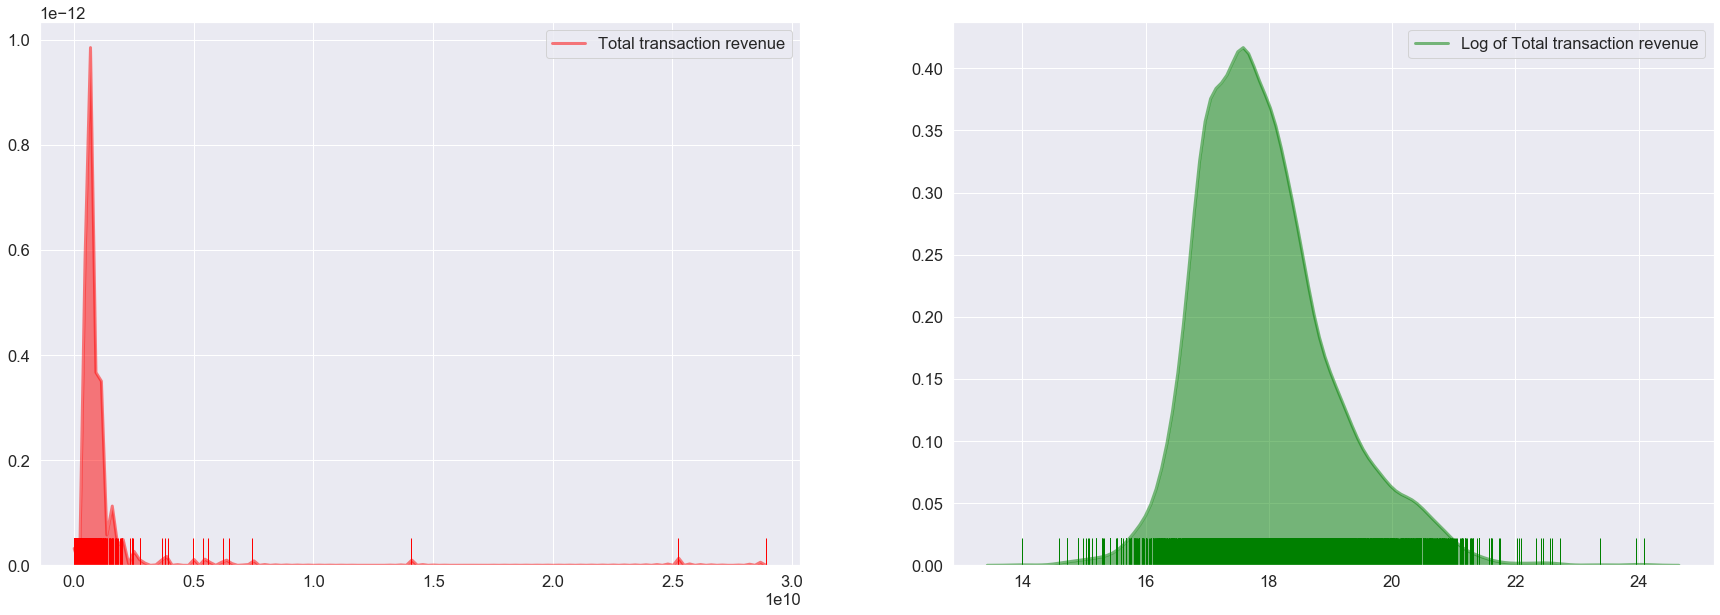

In [12]:
my.plot_totalTransRev_dist(train_sample)

In [11]:
reload(my)

<module 'TeamFunctionsA3' from '/Users/myfriendscallmej/Documents/Uni/158333 Applied Machine Learning and Data Visualisation/Assignment 3/notebooks/TeamFunctionsA3.py'>

In [413]:
colors = ['lightslategray',] * 2
colors[1] = 'crimson'
x=["Purchase Not Made","Purchase Made"]
y=train_sample.wasPurchaseMade.value_counts()
fig = go.Figure([go.Bar(x=x, y=y,marker_color=colors,text=y,name='Primary Product',
            textposition='auto', )])

fig.update_layout(title_text='Purchase made vs No Purchase made Imbalance',xaxis_tickfont_size=14,yaxis=dict(title='Purchase Count',titlefont_size=16,tickfont_size=14),height=800)
fig.show()

In [413] used 1.906 MiB RAM in 0.141s, peaked 0.000 MiB above current, total RAM usage 3501.141 MiB


In [41]:
my.plot_bar(train_sample)

In [41] used -194.641 MiB RAM in 2.513s, peaked 201.230 MiB above current, total RAM usage 1307.328 MiB


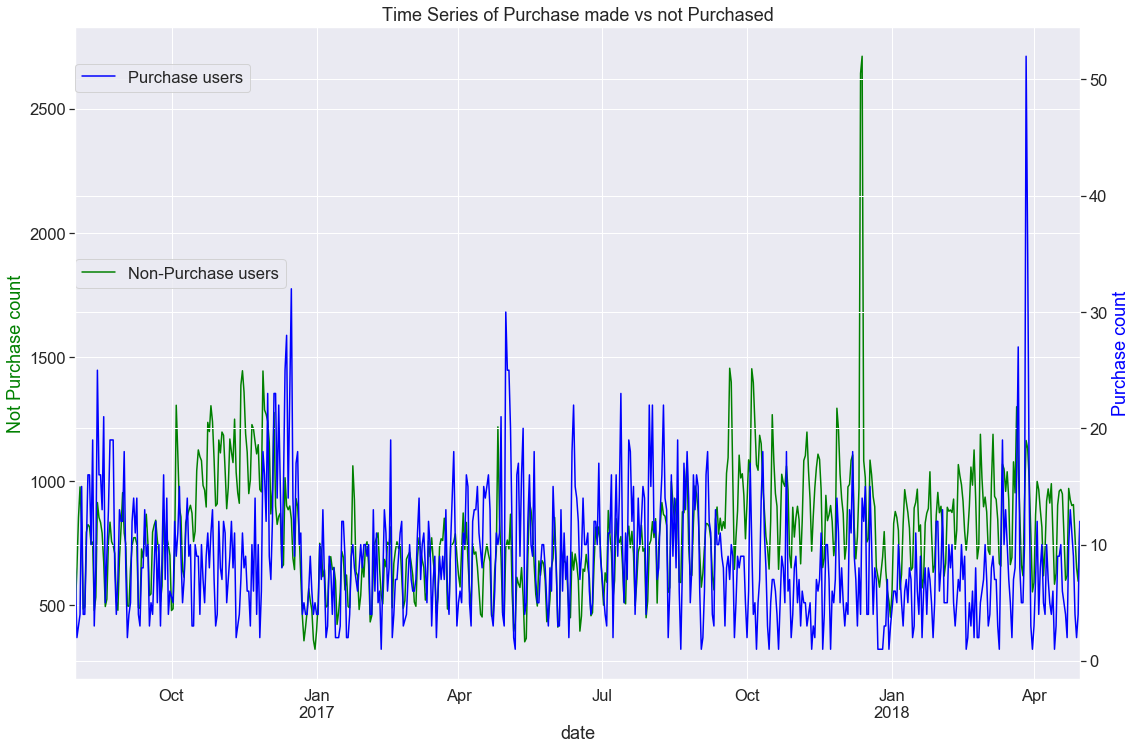

In [230] used -101.141 MiB RAM in 2.001s, peaked 671.617 MiB above current, total RAM usage 2367.289 MiB


In [230]:
my.PurchaseVSNotPurchase(train_sample)

In [231]:
my.season_date_by_ID(train_sample)

In [231] used -739.125 MiB RAM in 1.300s, peaked 739.105 MiB above current, total RAM usage 1749.562 MiB


In [244]:
my.season_date_by_ID(test_data_data)

In [244] used -35.836 MiB RAM in 0.202s, peaked 35.879 MiB above current, total RAM usage 3530.035 MiB


In [232]:
my.seasonal_totals(train_sample)

In [232] used -31.520 MiB RAM in 0.257s, peaked 32.059 MiB above current, total RAM usage 1818.016 MiB


## Feature Engineering

### First phase

Based on our EDA and a closer look at value counts we created a range of dummy variables in addition to the date-based and transaction-related features we created earlier. Where the number of unique values was low, a simple get_dummies() call was made but where the number of values was high and right-skewed as in many of the graphs above, a more manual approach was taken.

In some cases, the amount of dummies was limited a set number of top values or 'other' and in other cases we looked for certain commonalities in the feature values (eg. 'does the search keyword contain words like 'merch' or 'store'?) before creating the dummies.

In a few cases with a high number of NaN-like values such as 'not available in demo dataset', dummies were created on whether the value was one of these Nan-like values or not.

In [201]:
# train_sample['geoNetwork_country'].value_counts()[100:150]
# train_sample['geoNetwork_metro'].value_counts()
# train_sample['geoNetwork_networkDomain'].value_counts()
# train_sample['geoNetwork_region'].value_counts()
# train_sample['trafficSource_keyword'].value_counts()
# train_sample['trafficSource_keyword'].value_counts()
# train_sample['trafficSource_referralPath'].value_counts()
train_sample['trafficSource_source'].value_counts()

google                   197162
(direct)                 169994
youtube.com               99166
analytics.google.com      11190
Partners                   9985
sites.google.com           2673
google.com                 2539
dfa                        2004
m.facebook.com             1982
baidu                      1503
                          ...  
google.cl                     1
dena-design.qiita.com         1
search.myway.com              1
apps.rackspace.com            1
earth.google.com              1
ps-dm.reddit.com              1
google.ie                     1
google.rs                     1
images.google.com             1
google.ro                     1
Name: trafficSource_source, Length: 261, dtype: int64

In [201] used -52.730 MiB RAM in 0.058s, peaked 14.613 MiB above current, total RAM usage 1427.285 MiB


In [185]:
top_browsers = list(train_sample['device_browser'].value_counts().index[:10])
top_os = list(train_sample['device_operatingSystem'].value_counts().index[:7])
Nanlike_values = ['not available in demo dataset',  '(not set)']
countries_top50 = list(train_sample['geoNetwork_country'].value_counts().index[:50])
countries_50to100 = list(train_sample['geoNetwork_country'].value_counts().index[50:100])
countries_100plus = list(train_sample['geoNetwork_country'].value_counts().index[100:])

In [185] used 0.043 MiB RAM in 0.264s, peaked 0.000 MiB above current, total RAM usage 383.488 MiB


In [137]:
def extract_domain(x):
    if type(x)==float:
        return x
    else:
        return x[len(x)-3:]

In [137] used 0.004 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 355.031 MiB


In [206]:
train_sample = my.create_dummies(train_sample)
train_sample.shape

(512501, 463)

In [206] used 455.926 MiB RAM in 10.198s, peaked 474.641 MiB above current, total RAM usage 2199.062 MiB


In [221]:
test_data = my.create_dummies(test_data)
test_data.shape

(401589, 436)

In [221] used 507.562 MiB RAM in 7.631s, peaked 178.648 MiB above current, total RAM usage 5504.043 MiB


In [222]:
columns_not_in_test = list(col for col in train_sample.columns if col not in test_data.columns)
columns_not_in_train = list(col for col in test_data.columns if col not in train_sample.columns)
print(len(columns_not_in_test))
print(len(columns_not_in_train))

70
43
In [222] used 0.012 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 5441.801 MiB


In [224]:
train_sample.drop(columns_not_in_test, axis = 1, inplace=True)
test_data.drop(columns_not_in_train, axis = 1, inplace=True)
print(train_sample.shape)
print(test_data.shape)

(512501, 393)
(401589, 393)
In [224] used -3.059 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 5727.566 MiB


In [195]:
train_sample.head(20)

channelGrouping customDimensions       date        fullVisitorId  \
140849   Organic Search    North America 2018-01-19  2795181223025546221   
1033705          Direct             APAC 2017-08-08  8048540131646139407   
859203   Organic Search    North America 2017-05-02  3667356557831240042   
252896   Organic Search             EMEA 2017-09-25  2633849809105447851   
168186   Organic Search              NaN 2017-08-19  5711952579093373371   
469954         Referral    North America 2018-03-09  3070786493644891870   
441350         Referral             APAC 2017-08-09  3618134774372238108   
403386           Social    North America 2017-01-05   360686535099995413   
639985           Direct    North America 2017-02-05   649015047046538001   
211290         Referral              NaN 2018-03-06  6834579125984424041   
919828           Direct    North America 2017-10-24  2705906590539706832   
1382108          Direct             EMEA 2017-06-26  8725348127597315904   
429532   Organic Search             EMEA 2017-04-23  1004941180794625612   
1573058  Organic Search             APAC 2017-10-19   517711429945299628   
1455952        Referral    North America 2018-02-02  5709689100676100141   
862376   Organic Search    North America 2017-10-17  7700487792475241990   
1380248  Organic Search    North America 2017-12-23  7673263657575407962   
1302108     Paid Search    North America 2018-01-14   279135354247022556   
1433267         Display    North America 2017-10-10  5532234466982559781   
608593         Referral    North America 2018-04-09  8677751526674682860   

            visitId  visitNumber    device_browser device_deviceCategory  \
140849   1516409727            1            Chrome               desktop   
1033705  1502181547            1        UC Browser                mobile   
859203   1493758587            2            Safari                mobile   
252896   1506364966            1            Safari                mobile   
168186   1503198409            1            Safari                mobile   
469954   1520615295            6            Chrome               desktop   
441350   1502343966            3            Chrome               desktop   
403386   1483674867            1           Firefox               desktop   
639985   1486302717            1            Chrome                mobile   
211290   1520347414            2            Chrome                tablet   
919828   1508868157           22            Chrome               desktop   
1382108  1498462896            1            Chrome               desktop   
429532   1492944136            1            Chrome               desktop   
1573058  1508481220            1            Chrome               desktop   
1455952  1517609836            1            Chrome               desktop   
862376   1508304044            1           Firefox               desktop   
1380248  1514078133            1  Samsung Internet                mobile   
1302108  1515983803            1            Chrome                mobile   
1433267  1507620822            1   Android Webview                mobile   
608593   1523298884            1            Chrome               desktop   

         device_isMobile device_operatingSystem  \
140849                 0              Chrome OS   
1033705                1                Android   
859203                 1                    iOS   
252896                 1                    iOS   
168186                 1                    iOS   
469954                 0              Macintosh   
441350                 0                Windows   
403386                 0                Windows   
639985                 1                Android   
211290                 1                Android   
919828                 0                Windows   
1382108                0              Macintosh   
429532                 0                Windows   
1573058                0              Macintosh   
1455952                0              Macintosh  

In [195] used -0.336 MiB RAM in 0.079s, peaked 0.316 MiB above current, total RAM usage 478.102 MiB


In [200]:
train_sample.shape

(512501, 463)

In [200] used 0.020 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 1479.965 MiB


In [198]:
train_sample.head()

channelGrouping customDimensions       date        fullVisitorId  \
140849   Organic Search    North America 2018-01-19  2795181223025546221   
1033705          Direct             APAC 2017-08-08  8048540131646139407   
859203   Organic Search    North America 2017-05-02  3667356557831240042   
252896   Organic Search             EMEA 2017-09-25  2633849809105447851   
168186   Organic Search              NaN 2017-08-19  5711952579093373371   

            visitId  visitNumber device_browser device_deviceCategory  \
140849   1516409727            1         Chrome               desktop   
1033705  1502181547            1     UC Browser                mobile   
859203   1493758587            2         Safari                mobile   
252896   1506364966            1         Safari                mobile   
168186   1503198409            1         Safari                mobile   

         device_isMobile device_operatingSystem  \
140849                 0              Chrome OS   
1033705                1                Android   
859203                 1                    iOS   
252896                 1                    iOS   
168186                 1                    iOS   

                       geoNetwork_city geoNetwork_continent  \
140849   not available in demo dataset             Americas   
1033705  not available in demo dataset                 Asia   
859203   not available in demo dataset             Americas   
252896   not available in demo dataset               Europe   
168186                          Makati                 Asia   

        geoNetwork_country               geoNetwork_metro  \
140849       United States  not available in demo dataset   
1033705              India  not available in demo dataset   
859203       United States  not available in demo dataset   
252896      United Kingdom  not available in demo dataset   
168186         Philippines                      (not set)   

        geoNetwork_networkDomain              geoNetwork_region  \
140849               verizon.net  not available in demo dataset   
1033705                (not set)  not available in demo dataset   
859203                    rr.com  not available in demo dataset   
252896               virginm.net  not available in demo dataset   
168186                  pldt.net                   Metro Manila   

        geoNetwork_subContinent  totals_bounces  totals_hits  \
140849         Northern America               0           11   
1033705           Southern Asia               1            1   
859203         Northern America               1            1   
252896          Northern Europe               1            1   
168186           Southeast Asia               1            1   

         totals_newVisits  totals_pageviews  totals_sessionQualityDim  \
140849                  1                 9                         2   
1033705                 1                 1                         1   
859203                  0                 1                         0   
252896                  1                 1                         1   
168186                  1                 1                         1   

         totals_timeOnSite  totals_totalTransactionRevenue  \
140849                 113                             0.0   
1033705                  0                             0.0   
859203                   0                             0.0   
252896                   0                             0.0   
168186                   0                             0.0   

         totals_transactionRevenue  totals_transactions  \
140849                         0.0                    0   
1033705                        0.0                    0   
859203                         0.0                    0   
252896                         0.0                    0   
168186                         0.0                    0   

        trafficSource_adContent trafficSource_adwordsClickInfo.adNetworkType  \
140849                  

In [198] used 0.027 MiB RAM in 0.050s, peaked 0.000 MiB above current, total RAM usage 707.961 MiB


In [233]:
train_sample.to_csv ('../datasets/train_sample_flat_with_dummies.csv', index=False)
test_data.to_csv  ('../datasets/test_flat_full_with_dummies.csv', index=False)

In [233] used -96.449 MiB RAM in 307.433s, peaked 96.398 MiB above current, total RAM usage 1753.234 MiB


### Second phase

A second phase of engineering, conducted after initial models were built looked to combine features and add a number of seasonal components. Features that showed promising correlations earlier (eg. page views) were combined with other features and then applied times series calculations like rolling sums, means and averages. The full range of features added in this round can be seen in the accompanying py files.

## Applying full process to both datasets

In [234]:
train_full = pd.read_csv('../datasets/train_flat_full.csv', infer_datetime_format=True, parse_dates=['date'], 
                      dtype={'fullVisitorId': 'str'})

In [234] used 670.070 MiB RAM in 13.208s, peaked 448.832 MiB above current, total RAM usage 2521.422 MiB


In [235]:
train_full.size

82000176

In [235] used -0.016 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 2433.539 MiB


In [236]:
train_full = my.create_dummies(train_full)

In [236] used 2069.301 MiB RAM in 33.471s, peaked 1631.906 MiB above current, total RAM usage 4502.879 MiB


In [237]:
train_full.size

932752002

In [237] used -0.020 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 4265.102 MiB


In [238]:
train_full.shape

(1708337, 546)

In [238] used 0.000 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 4265.125 MiB


In [239]:
columns_not_in_test = list(col for col in train_full.columns if col not in test_data.columns)
columns_not_in_train_full = list(col for col in test_data.columns if col not in train_full.columns)
print(len(columns_not_in_test))
print(len(columns_not_in_train_full))

153
0
In [239] used 0.043 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 3896.609 MiB


In [240]:
train_full.drop(columns_not_in_test, axis = 1, inplace=True)

In [240] used 60.191 MiB RAM in 5.848s, peaked 2541.586 MiB above current, total RAM usage 3871.977 MiB


In [241]:
train_full.shape

(1708337, 393)

In [241] used 0.004 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 3779.004 MiB


In [242]:
train_full.to_csv('../datasets/train_full_flat_with_dummies.csv', index=False)

In [242] used -100.742 MiB RAM in 658.198s, peaked 101.016 MiB above current, total RAM usage 3678.262 MiB


In [416]:
test_data.shape

(401589, 393)

In [416] used -15.797 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 5402.824 MiB


In [14]:
train_full=my.add_features(train_full)

In [15]:
train_full.shape

(1708337, 422)

In [17]:
train_full.head(5)

channelGrouping customDimensions       date        fullVisitorId  \
0  Organic Search             EMEA 2017-10-16  3162355547410993243   
1        Referral    North America 2017-10-16  8934116514970143966   
2          Direct    North America 2017-10-16  7992466427990357681   
3  Organic Search             EMEA 2017-10-16  9075655783635761930   
4  Organic Search  Central America 2017-10-16  6960673291025684308   

      visitId  visitNumber device_browser device_deviceCategory  \
0  1508198450            1        Firefox               desktop   
1  1508176307            6         Chrome               desktop   
2  1508201613            1         Chrome                mobile   
3  1508169851            1         Chrome               desktop   
4  1508190552            1         Chrome               desktop   

   device_isMobile device_operatingSystem                geoNetwork_city  \
0                0                Windows  not available in demo dataset   
1                0              Chrome OS                      Cupertino   
2                1                Android  not available in demo dataset   
3                0                Windows  not available in demo dataset   
4                0                Windows  not available in demo dataset   

  geoNetwork_continent geoNetwork_country                   geoNetwork_metro  \
0               Europe            Germany      not available in demo dataset   
1             Americas      United States  San Francisco-Oakland-San Jose CA   
2             Americas      United States      not available in demo dataset   
3                 Asia             Turkey      not available in demo dataset   
4             Americas             Mexico      not available in demo dataset   

  geoNetwork_networkDomain              geoNetwork_region  \
0                (not set)  not available in demo dataset   
1                (not set)                     California   
2      windjammercable.net  not available in demo dataset   
3          unknown.unknown  not available in demo dataset   
4    prod-infinitum.com.mx  not available in demo dataset   

  geoNetwork_subContinent  totals_bounces  totals_hits  totals_newVisits  \
0          Western Europe               1            1                 1   
1        Northern America               0            2                 0   
2        Northern America               0            2                 1   
3            Western Asia               0            2                 1   
4         Central America               0            2                 1   

   totals_pageviews  totals_sessionQualityDim  totals_timeOnSite  \
0                 1                         1                  0   
1                 2                         2                 28   
2                 2                         1                 38   
3                 2                         1                  1   
4                 2                         1                 52   

   totals_totalTransactionRevenue  totals_transactionRevenue  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   totals_transactions trafficSource_adContent  \
0                    0                     NaN   
1                    0                     NaN   
2                    0                     NaN   
3                    0                     NaN   
4                    0                     NaN   

  trafficSource_adwordsClickInfo.adNetworkType  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   trafficSource_adw

In [28]:
# train_full.to_csv('../datasets/train_final_dataset.csv', index=False)

In [22]:
test_data = my.add_features(test_data)

In [23]:
test_data.shape

(401589, 422)

In [24]:
test_data.head(5)

channelGrouping customDimensions       date        fullVisitorId  \
0  Organic Search             APAC 2018-05-11  7460955084541987166   
1          Direct    North America 2018-05-11   460252456180441002   
2  Organic Search    North America 2018-05-11  3461808543879602873   
3          Direct    North America 2018-05-11   975129477712150630   
4  Organic Search    North America 2018-05-11  8381672768065729990   

      visitId  visitNumber     device_browser device_deviceCategory  \
0  1526099341            2             Chrome                mobile   
1  1526064483          166             Chrome               desktop   
2  1526067157            2             Chrome               desktop   
3  1526107551            4             Chrome                mobile   
4  1526060254            1  Internet Explorer                tablet   

   device_isMobile device_operatingSystem geoNetwork_city  \
0                1                Android             NaN   
1                0              Macintosh   San Francisco   
2                0              Chrome OS             NaN   
3                1                    iOS         Houston   
4                1                Windows          Irvine   

  geoNetwork_continent geoNetwork_country                   geoNetwork_metro  \
0                 Asia              India                                NaN   
1             Americas      United States  San Francisco-Oakland-San Jose CA   
2             Americas      United States                                NaN   
3             Americas      United States                         Houston TX   
4             Americas      United States                     Los Angeles CA   

  geoNetwork_networkDomain geoNetwork_region geoNetwork_subContinent  \
0                      NaN             Delhi           Southern Asia   
1                (not set)        California        Northern America   
2  onlinecomputerworks.com               NaN        Northern America   
3                (not set)             Texas        Northern America   
4                      com        California        Northern America   

   totals_bounces  totals_hits  totals_newVisits  totals_pageviews  \
0               0            4                 0                 3   
1               0            4                 0                 3   
2               0            4                 0                 3   
3               0            5                 0                 4   
4               0            5                 1                 4   

   totals_sessionQualityDim  totals_timeOnSite  \
0                         1                973   
1                         1                 49   
2                         1                 24   
3                         1                 25   
4                         1                 49   

   totals_totalTransactionRevenue  totals_transactionRevenue  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             0.0                        0.0   
4                             0.0                        0.0   

   totals_transactions trafficSource_adContent  \
0                    0               (not set)   
1                    0               (not set)   
2                    0               (not set)   
3                    0               (not set)   
4                    0               (not set)   

  trafficSource_adwordsClickInfo.adNetworkType  \
0                                          NaN   
1                                          NaN   
2                                          NaN   
3                                          NaN   
4                                          NaN   

   trafficSource_adwordsClickInfo.isVideoAd  \
0                                         1   
1                                         1   
2                      

In [25]:
# test_data.to_csv('../datasets/test_final_dataset.csv', index=False)

In [29]:
# del train_full

## Feature Selection

It is at this point where our notebook begins to split into two parts, as memory issues became to the fore and there were issues importing some libraries on one machine for lgbm and XGboost to incorporate everyting on one notebook.

Initially, we looked at correlations to the target value for the entire dataset and for when an actual purchase was made, honing in on the top 20 (ranked for actual purchases). While it may seem logical that correlation to transasction amount would increase when a purchase was made the table highlights that some correations increase by different amounts or flips direction. This again suggests that there are different factors important to a regression if done on the whole set versus one done on just successful purchases and kept us moving towards a strategy of trying to predict class before applying a regression.

In part 2 of our notebook, we use feature scoring based on root mean square error to select two sets of features.

Meanwhile, we also re-examined categorical values based on a chi-squared analysis and employed selectKbest (measuring f_regression score or chi-squared) to select subsets data for regression or classifying respectively.

In [254]:
train_sample.columns[48:]

Index(['device_browser_short', 'device_OS_short', 'city_isNan', 'metro_isNan',
       'domain', 'region_isNan', 'campaign_isNan', 'keyword_provided',
       'keyword_merch', 'keyword_google',
       ...
       'domain_vel', 'domain_xyz', 'domain_y', 'domain_z', 'medium_(not set)',
       'medium_affiliate', 'medium_cpc', 'medium_cpm', 'medium_organic',
       'medium_referral'],
      dtype='object', length=345)

In [254] used -0.039 MiB RAM in 0.003s, peaked 0.000 MiB above current, total RAM usage 3597.785 MiB


In [12]:
cat_cols2 = cat_cols+ list(train_sample.columns[48:])
correlate_features2 = correlate_features + list(train_sample.columns[50:])
for col in correlate_features2:
    if train_sample[col].dtype=='O':
        correlate_features2.remove(col)

In [12] used -0.035 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 2074.043 MiB


In [269]:
new_correlation_table = compare_correlations(train_sample, correlate_features2)
new_correlation_table[:20]

Correlation to amount (all visits)  \
visitNumber                                            0.045690   
totals_pageviews                                       0.134509   
totals_hits                                            0.130638   
totals_timeOnSite                                      0.092765   
medium_cpm                                             0.014544   
channel_Display                                        0.002890   
browser_Firefox                                        0.003445   
source_other                                           0.000528   
trafficSource_isTrueDirect                             0.021743   
channel_Direct                                         0.008417   
OS_Windows                                            -0.003058   
totals_newVisits                                      -0.026180   
domain_net                                             0.008942   
device_isMobile                                       -0.013620   
desktop                                                0.013622   
mobile                                                -0.012610   
channel_Organic Search                                -0.010078   
metro_isNan                                           -0.015529   
subcontinent_Western Africa                           -0.000642   
region_isNan                                          -0.005070   

                             Correlation to amount (actual purchases)  \
visitNumber                                                  0.366159   
totals_pageviews                                             0.176478   
totals_hits                                                  0.173668   
totals_timeOnSite                                            0.141924   
medium_cpm                                                   0.097180   
channel_Display                                              0.094733   
browser_Firefox                                              0.078578   
source_other                                                 0.065985   
trafficSource_isTrueDirect                                   0.065646   
channel_Direct                                               0.060895   
OS_Windows                                                   0.058946   
totals_newVisits                                            -0.054019   
domain_net                                                   0.048771   
device_isMobile                                             -0.044907   
desktop                                                      0.044907   
mobile                                                      -0.041783   
channel_Organic Search                                      -0.041537   
metro_isNan                                                  0.036259   
subcontinent_Western Africa                                  0.035741   
region_isNan                                                 0.035570   

                             Increase in absolute value  
visitNumber                                    0.320469  
totals_pageviews                               0.041969  
totals_hits                                    0.043030  
totals_timeOnSite                              0.049159  
medium_cpm                                     0.082636  
channel_Display                                0.091843  
browser_Firefox                                0.075133  
source_other                                   0.065457  
trafficSource_isTrueDirect                     0.043903  
channel_Direct                                 0.052478  
OS_Windows                                     0.055888  
totals_newVisits                               0.027839  
domain_net                                     0.039829  
device_isMobile                                0.031288  
desktop                                        0.031286  
mobile                                         0.029172  
channel_Organic Search                         0.031459  
metro_isNan                                

In [269] used -67.234 MiB RAM in 30.258s, peaked 968.055 MiB above current, total RAM usage 1654.676 MiB


In [14]:
chi_squared_cats2_v_purchaseMade = my.chi_squared_analysis(train_sample, cat_cols2, 'wasPurchaseMade')

In [14] used 392.828 MiB RAM in 166.076s, peaked 63.520 MiB above current, total RAM usage 2466.875 MiB


In [15]:
chi_squared_cats2_v_purchaseMade.iloc[:,0:160]

Feature            trafficSource_referralPath referral_short geoNetwork_city  \
Pearson Chi-square                    7563.03         9808.3         7646.83   
p-value                                     0              0               0   
Cramer's V                             0.2109         0.1383          0.1221   
Degrees of Freedom                       2016              1             935   
%NaNs                                0.668192              0               0   
Type                                   object          int64          object   

Feature            geoNetwork_country channelGrouping geoNetwork_metro  \
Pearson Chi-square            6646.21         6575.77           6557.3   
p-value                             0               0                0   
Cramer's V                     0.1139          0.1133           0.1131   
Degrees of Freedom                213               7              121   
%NaNs                               0               0                0   
Type                           object          object           object   

Feature            geoNetwork_region custDim_North America  \
Pearson Chi-square           6436.64               6163.34   
p-value                            0                     0   
Cramer's V                    0.1121                0.1097   
Degrees of Freedom               478                     1   
%NaNs                              0                     0   
Type                          object                 int64   

Feature            geoNetwork_subContinent subcontinent_Northern America  \
Pearson Chi-square                 6149.73                        6144.7   
p-value                                  0                             0   
Cramer's V                          0.1095                        0.1095   
Degrees of Freedom                      22                             1   
%NaNs                                    0                             0   
Type                                object                         int64   

Feature            channel_Referral customDimensions geoNetwork_continent  \
Pearson Chi-square           5778.2          4075.31              4857.41   
p-value                           0                0                    0   
Cramer's V                   0.1062           0.0994               0.0974   
Degrees of Freedom                1                4                    5   
%NaNs                             0         0.194706                    0   
Type                          int64           object               object   

Feature            continent_Americas trafficSource_source metro_isNan  \
Pearson Chi-square            4856.09              4533.95     4230.38   
p-value                             0                    0           0   
Cramer's V                     0.0973               0.0941      0.0909   
Degrees of Freedom                  1                  260           1   
%NaNs                               0                    0           0   
Type                            int64               object     float64   

Feature            trafficSource_medium device_operatingSystem  \
Pearson Chi-square              4049.14                3996.62   
p-value                               0                      0   
Cramer's V                       0.0889                 0.0883   
Degrees of Freedom                    6                     22   
%NaNs                                 0                      0   
Type                             object                 object   

Feature            device_OS_short source_direct   domain OS_Macintosh  \
Pearson Chi-square         3996.62       3723.34  3449.02      2531.51   
p-value                          0             0        0            0   
Cramer's V                  0.0883        0.0852    0.082       0.0703   
Degrees of Freedom               7             1      322            1   
%NaNs                            0             0        0   

In [15] used -7.906 MiB RAM in 0.066s, peaked 7.926 MiB above current, total RAM usage 2349.273 MiB


In [296]:
train_sample[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512501 entries, 140849 to 177285
Data columns (total 26 columns):
channelGrouping                             512501 non-null object
customDimensions                            412714 non-null object
device_browser                              512501 non-null object
device_deviceCategory                       512501 non-null object
device_operatingSystem                      512501 non-null object
geoNetwork_city                             512501 non-null object
geoNetwork_continent                        512501 non-null object
geoNetwork_subContinent                     512501 non-null object
geoNetwork_country                          512501 non-null object
geoNetwork_metro                            512501 non-null object
geoNetwork_networkDomain                    512501 non-null object
geoNetwork_region                           512501 non-null object
trafficSource_campaign                      512501 non-null object
trafficSource

In [17]:
cat_cols_trimmed = list(chi_squared_cats2_v_purchaseMade.columns)[:159]
cat_cols_trimmed = list(col for col in cat_cols_trimmed if train_sample[col].dtype!='O' and train_sample[col].isna().sum() / len(train_sample[col]) <0.3)

In [17] used -0.055 MiB RAM in 0.668s, peaked 0.000 MiB above current, total RAM usage 2330.773 MiB


In [32]:
best50_classify = my.selectKbest_classify(train_sample[['wasPurchaseMade'] + cat_cols_trimmed], 'wasPurchaseMade', 50)

In [32] used 76.691 MiB RAM in 4.589s, peaked 1072.332 MiB above current, total RAM usage 4416.637 MiB


In [265]:
best75_classify = my.selectKbest_classify(train_sample[['wasPurchaseMade'] + cat_cols_trimmed], 'wasPurchaseMade', 75)

In [265] used 487.164 MiB RAM in 5.351s, peaked 1077.211 MiB above current, total RAM usage 4906.145 MiB


In [115]:
numerical_cols = list (col for col in train_sample.columns if (train_sample[col].dtype == np.float64  or train_sample[col].dtype == np.int64))
print(len(numerical_cols))
numerical_cols = list (col for col in numerical_cols if col not in exclude_cols)
print(len(numerical_cols))
numerical_cols = list (col for col in numerical_cols if train_sample[col].isna().sum() / len(train_sample[col]) <0.1)
print(len(numerical_cols))

368
362
360
In [115] used -17.742 MiB RAM in 1.617s, peaked 17.750 MiB above current, total RAM usage 7445.012 MiB


In [100]:
len(numerical_cols)

363

In [100] used -0.020 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 4848.930 MiB


In [30]:
#numerical_cols

In [195]:
ranked_regression_features = my.rank_regression_features_using_selectKbest(train_sample, numerical_cols, 'totals_transactionRevenue')

In [195] used -1627.918 MiB RAM in 8.130s, peaked 4092.777 MiB above current, total RAM usage 3470.660 MiB


In [196]:
best50_regression = ranked_regression_features.Feature.values[0:50]
best100_regression = ranked_regression_features.Feature.values[0:100]
best150_regression = ranked_regression_features.Feature.values[0:150]
best200_regression = ranked_regression_features.Feature.values[0:200]

In [196] used 0.066 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 3589.344 MiB


## Building Models

### Classifiers

Our first serious attempts were built with the random forrest regressor and random forrest classifer. Using a downsample ratio of 1 to 1 taken from our 500,000 sample, and thne later form the full set to get more samples to train on, a random forrest classifier was built but upon closer inspection we saw that it wasn't predicting postive classes when applied to the test set. Adaboost performed better in predicting classes, but was guilty of over-predicting positive classes, eventually prodicting postive 'wasPurchaseMade' class labels at a 1 to 2 ratio in the test set. At this point Random Forest was still producing exttremely high error rates in submission scores and clearly much more work was needed.

About this time, we were also moving into trials of XG boost and lgbm so we put adaboost and random forest to one side and focused on those models once the results showed a massive improvement following those methods. We also realised that producing class probabilities rather than labels would integrate better with regression later on and prevent any issues in trying to log zero values for transaction amount if we predicted no purchase would be made.

In [301]:
downsample1to1_50_noNaNs = my.create_downsample(train_sample.fillna(-999), best50_classify, 'wasPurchaseMade', 1)

1    5524
0    5524
Name: wasPurchaseMade, dtype: int64
In [301] used 239.520 MiB RAM in 1.835s, peaked 482.504 MiB above current, total RAM usage 3334.777 MiB


In [303]:
X_train, X_test, y_train, y_test = train_test_split(downsample1to1_50_noNaNs[best50_classify], downsample1to1_50_noNaNs['wasPurchaseMade'], random_state=1, test_size=0.2)

In [303] used 1.320 MiB RAM in 0.013s, peaked 0.000 MiB above current, total RAM usage 2978.168 MiB


In [307]:
rfc100 = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)
rfc100_pred = rfc100.predict(X_test)
print('accuracy:', metrics.accuracy_score(y_test, rfc100_pred))
print('f1:', metrics.f1_score(y_test, rfc100_pred))
print('recall:', metrics.recall_score(y_test, rfc100_pred))

accuracy: 0.7751131221719457
f1: 0.7797961896322553
recall: 0.8
auc_roc: 0.860591728091728
In [307] used -102.113 MiB RAM in 0.670s, peaked 102.133 MiB above current, total RAM usage 3007.520 MiB


In [241]:
def rfc_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10,20,30,40,50,100, 1000
                            ),
        },
        cv=5, scoring='recall', verbose=0,n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    print('best_params =', best_params)
    rfc = RandomForestClassifier(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfc, X, y, cv=10, scoring='recall')

    return scores, rfc

In [241] used 0.230 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 7468.793 MiB


In [310]:
rfc_model(downsample1to1_50_noNaNs[best50_classify], downsample1to1_50_noNaNs['wasPurchaseMade'])

best_params = {'max_depth': 3, 'n_estimators': 30}


(array([0.86980108, 0.91500904, 0.88969259, 0.88065099, 0.9057971 ,
        0.85688406, 0.89130435, 0.89855072, 0.89130435, 0.86594203]),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=3, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=30,
                        n_jobs=None, oob_score=False, random_state=False,
                        verbose=False, warm_start=False))

In [310] used -163.945 MiB RAM in 18.255s, peaked 163.945 MiB above current, total RAM usage 2954.980 MiB


In [239]:
downsample1to1_50_full_noNaNs = my.create_downsample(train_full.fillna(-999), best50_classify, 'wasPurchaseMade', 1)

1    18559
0    18559
Name: wasPurchaseMade, dtype: int64
In [239] used 1803.938 MiB RAM in 8.900s, peaked 3158.316 MiB above current, total RAM usage 7396.477 MiB


In [266]:
downsample1to1_75_full_noNaNs = my.create_downsample(train_full.fillna(-999), best75_classify, 'wasPurchaseMade', 1)

1    18559
0    18559
Name: wasPurchaseMade, dtype: int64
In [266] used 1670.051 MiB RAM in 13.498s, peaked 3257.855 MiB above current, total RAM usage 6382.438 MiB


In [248]:
_, rfc_train_full_downsample1to1 = rfc_model(downsample1to1_50_full_noNaNs[best50_classify], downsample1to1_50_full_noNaNs['wasPurchaseMade'])

best_params = {'max_depth': 3, 'n_estimators': 10}
In [248] used 18.965 MiB RAM in 50.037s, peaked 22.379 MiB above current, total RAM usage 4787.027 MiB


In [249]:
rfc_train_full_downsample1to1.fit(train_full[best50_classify], train_full['wasPurchaseMade'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=False,
                       verbose=False, warm_start=False)

In [249] used 696.219 MiB RAM in 8.860s, peaked 1366.746 MiB above current, total RAM usage 5464.852 MiB


In [255]:
test_predicted_class = rfc_train_full_downsample1to1.predict(test_data[best50_classify])

In [255] used 239.738 MiB RAM in 0.498s, peaked 79.184 MiB above current, total RAM usage 5411.078 MiB


In [256]:
test_predicted_class

array([0, 0, 0, ..., 0, 0, 0])

In [256] used -0.016 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 5174.516 MiB


In [262]:
set(test_predicted_class)

{0}

In [262] used 0.008 MiB RAM in 0.060s, peaked 0.000 MiB above current, total RAM usage 5173.191 MiB


In [ ]:
submission_rfc100 = pd.DataFrame(testing_set['TransactionID'])
rfc_y = test_data[best50features]
rfc100_prob = rfc100.predict_proba(rfc_y.fillna(-999))
prob = pd.DataFrame(rfc100_prob, columns=['notFraud', 'isFraud'])
submission_rfc100 = submission_rfc100.join(prob, how='outer')
submission_rfc100.set_index('TransactionID', inplace=True)
submission_rfc100.drop('notFraud', axis=1, inplace=True)
submission_rfc100.head()

In [264]:
my.cross_validation_testing(downsample1to1_50_full_noNaNs[['wasPurchaseMade'] + best50_classify],4,best50_classify, 'wasPurchaseMade', 30)

Fold              0         1         2         3  Cross-Val Mean
Precision   0.81262  0.810209  0.810034  0.805154        0.809504
Recall     0.809593   0.80463  0.803816  0.801986        0.805006
F1         0.808951  0.804257  0.803118  0.800964        0.804322
Support        None      None      None      None             NaN

In [264] used -85.160 MiB RAM in 262.450s, peaked 184.770 MiB above current, total RAM usage 4157.477 MiB


In [267]:
my.cross_validation_testing(downsample1to1_50_full_noNaNs[['wasPurchaseMade'] + best50_classify],4,best50_classify, 'wasPurchaseMade', 50)

Fold              0         1         2         3  Cross-Val Mean
Precision  0.800768  0.816074  0.814575  0.812244        0.810915
Recall     0.795818  0.812166  0.810098  0.807274        0.806339
F1         0.794426  0.811504  0.809341  0.807115        0.805596
Support        None      None      None      None             NaN

In [267] used -1377.418 MiB RAM in 445.525s, peaked 1477.480 MiB above current, total RAM usage 5933.180 MiB


In [268]:
my.cross_validation_testing(downsample1to1_75_full_noNaNs[['wasPurchaseMade'] + best75_classify],4,best50_classify, 'wasPurchaseMade', 30)

Fold              0         1         2         3  Cross-Val Mean
Precision  0.809653  0.808516  0.814111  0.806928        0.809802
Recall       0.8046  0.803364  0.809039   0.80275        0.804938
F1         0.804329  0.802778  0.807534  0.801926        0.804142
Support        None      None      None      None             NaN

In [268] used 67.699 MiB RAM in 293.975s, peaked 39.547 MiB above current, total RAM usage 4918.043 MiB


In [272]:
adaboost_classifier_down50_50T=my.train_adaboost(downsample1to1_50_full_noNaNs[['wasPurchaseMade'] + best50_classify], 'wasPurchaseMade', best50_classify, 50)

In [272] used 33.043 MiB RAM in 149.165s, peaked 19.930 MiB above current, total RAM usage 3667.926 MiB


In [393]:
def classify_sample3(xi, boost_classif, predictor_variables):
    boost_classif = boost_classif.values
    alpha_sum = np.float64(0)
    classification_sum = np.float64(0)
    positive_alpha = np.float64(0)
    
    for thresh, feat, sign, alpha, featname in boost_classif:
        
        ht = np.sign(xi[predictor_variables[int(feat)]] - thresh) * sign
        classification_sum += alpha*ht 
        alpha_sum += alpha
        
        if ht >=0:
            positive_alpha += alpha 
            
    prob_positive = positive_alpha / alpha_sum   
            
    if classification_sum >= 0:
        return 1, prob_positive
    else:
        return -1, prob_positive

In [393] used 0.098 MiB RAM in 0.003s, peaked 0.000 MiB above current, total RAM usage 3596.273 MiB


In [397]:
predicted_class_adaboost = np.zeros(len(test_data))
probability_clas_adaboost = np.zeros(len(test_data))

for i in range(len(test_data)):
    predicted_class_adaboost[i], probability_clas_adaboost = classify_sample3(test_data.iloc[i], adaboost_classifier_down50_50T, best50_classify)  

In [397] used 772.074 MiB RAM in 509.264s, peaked 0.000 MiB above current, total RAM usage 4546.625 MiB


In [295]:
predicted_class_adaboost = pd.DataFrame(predicted_class_adaboost)

In [295] used 4.652 MiB RAM in 0.004s, peaked 0.000 MiB above current, total RAM usage 3407.566 MiB


In [298]:
predicted_class_adaboost[0].value_counts()

-1.0    282151
 1.0    119438
Name: 0, dtype: int64

In [298] used 234.266 MiB RAM in 0.018s, peaked 0.000 MiB above current, total RAM usage 3546.492 MiB


### Random Forest Regression

As outlined above, random forest regression was eventually discarded as an option once we started making good progress with other methods but before doing so we did experiement with grid search to find the best combination of paramaters for use with the sample size and features we had chosen to begin with. Furtehr experiements were planned with other sample technciques and sizes but those were, like AdaBoost for an option for classifying, put aside in favour of putting all our effort into the models showing the most promise.

A more detailed explanation of the trials and results with XGBost and lgbm can be found in part 2 of this notebook.

In [130]:
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** .5

In [130] used 0.023 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 5369.102 MiB


In [131]:
rmse_scorer = metrics.make_scorer(rmse, greater_is_better=False)

In [131] used 0.027 MiB RAM in 0.001s, peaked 0.000 MiB above current, total RAM usage 5420.047 MiB


In [132]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,7),
            'n_estimators': (10,20,30,40,50,100, 1000
                            ),
        },
        cv=5, scoring=rmse_scorer, verbose=0,n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    print('best_params =', best_params)
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=10, scoring=rmse_scorer)
    print(scores)
    
    return rfr

In [132] used 0.000 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 5420.094 MiB


In [134]:
len(train_sample)

512501

In [134] used 0.289 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 4621.078 MiB


In [144]:
train_sample_small50k = train_sample.sample(frac=0.1, random_state=8)
train_sample_small100k = train_sample.sample(frac=0.2, random_state=8)
train_sample_small200k = train_sample.sample(frac=0.4, random_state=8)

In [144] used 1119.379 MiB RAM in 1.959s, peaked 0.000 MiB above current, total RAM usage 5756.395 MiB


In [138]:
len(train_sample_small50k)

51250

In [138] used 0.000 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 4905.121 MiB


In [200]:
rf_regressor_grid_sample_small50_best50 = rfr_model(train_sample_small50k[best50_regression], train_sample_small50k['totals_transactionRevenue'])
rf_regressor_grid_sample_small50_best50.fit(train_sample_small50k[best50_regression], train_sample_small50k['totals_transactionRevenue'])
predictions_grid_sample_small50_best50 = rf_regressor_grid_sample_small50_best50.predict(test_data[best50_regression])
submission_rfr_grid_sample_small50_best50 = pd.DataFrame(test_data['fullVisitorId'])
submission_rfr_grid_sample_small50_best50['PredictedRevenue'] = predictions_grid_sample_small50_best50
submission_rfr_grid_sample_small50_best50 = submission_rfr_grid_sample_small50_best50.groupby('fullVisitorId').sum()
submission_rfr_grid_sample_small50_best50['PredictedLogRevenue'] = np.log(submission_rfr_grid_sample_small50_best50['PredictedRevenue'])
submission_rfr_grid_sample_small50_best50.drop(columns='PredictedRevenue', inplace=True)
submission_rfr_grid_sample_small50_best50.to_csv('../datasets/submission_rfr_grid_sample_small50_best50v2.csv')
!kaggle competitions submit -c ga-customer-revenue-prediction -f '../datasets/submission_rfr_grid_sample_small50_best50v2.csv' -m "RF Reg, grid search, 50k sample, selectKbest=50"

100%|███████████████████████████████████████| 11.0M/11.0M [00:13<00:00, 857kB/s]
Successfully submitted to Google Analytics Customer Revenue PredictionIn [200] used 0.004 MiB RAM in 18.185s, peaked 0.000 MiB above current, total RAM usage 3531.934 MiB


In [186] used 0.000 MiB RAM in 0.012s, peaked 0.000 MiB above current, total RAM usage 5081.516 MiB


In [187]:
submission_rfr_grid_sample_small50_best50.describe()

PredictedRevenue
count      4.015890e+05
mean       1.455470e+06
std        9.403444e+06
min        3.131387e+05
25%        3.131387e+05
50%        3.131387e+05
75%        3.131387e+05
max        2.244164e+09

In [187] used 1.539 MiB RAM in 0.025s, peaked 0.000 MiB above current, total RAM usage 5089.332 MiB


In [159]:
submission_rfr_grid_sample_small50_best50.groupby('fullVisitorId').sum().describe()

PredictedRevenue
count      2.965300e+05
mean       1.971135e+06
std        1.933067e+07
min        3.131387e+05
25%        3.131387e+05
50%        3.131387e+05
75%        3.131387e+05
max        8.777722e+09

In [159] used 13.965 MiB RAM in 0.668s, peaked 3.535 MiB above current, total RAM usage 5028.246 MiB


In [180]:
submission_rfr_grid_sample_small50_best50.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296530 entries, 0 to 296529
Data columns (total 2 columns):
fullVisitorId          296530 non-null object
PredictedLogRevenue    296530 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.8+ MB
In [180] used -5.809 MiB RAM in 0.061s, peaked 5.789 MiB above current, total RAM usage 5068.719 MiB


In [201]:
rf_regressor_grid_sample_small100_best50 = rfr_model(train_sample_small100k[best50_regression], train_sample_small100k['totals_transactionRevenue'])

best_params = {'max_depth': 5, 'n_estimators': 20}
[-15009950.44839554 -13497948.44687225 -28878146.07188451
 -13139790.07412833 -19913960.34050204 -14349598.69120214
 -23094099.27480889 -22433842.84892358 -18991253.78476231
 -32745504.74266822]
In [201] used 76.992 MiB RAM in 1753.272s, peaked 62.746 MiB above current, total RAM usage 3605.660 MiB


In [202]:
rf_regressor_grid_sample_small100_best50.fit(train_sample_small100k[best50_regression], train_sample_small100k['totals_transactionRevenue'])
predictions_grid_sample_small100_best50 = rf_regressor_grid_sample_small100_best50.predict(test_data[best50_regression])
submission_rfr_grid_sample_small100_best50 = pd.DataFrame(test_data['fullVisitorId'])
submission_rfr_grid_sample_small100_best50['PredictedRevenue'] = predictions_grid_sample_small100_best50
submission_rfr_grid_sample_small100_best50 = submission_rfr_grid_sample_small100_best50.groupby('fullVisitorId').sum()
submission_rfr_grid_sample_small100_best50['PredictedLogRevenue'] = np.log(submission_rfr_grid_sample_small100_best50['PredictedRevenue'])
submission_rfr_grid_sample_small100_best50.drop(columns='PredictedRevenue', inplace=True)
submission_rfr_grid_sample_small100_best50.to_csv('../datasets/submission_rfr_grid_sample_small100_best50v2.csv')
!kaggle competitions submit -c ga-customer-revenue-prediction -f '../datasets/submission_rfr_grid_sample_small100_best50v2.csv' -m "RF Reg, grid search, 100k sample, selectKbest=50"

100%|███████████████████████████████████████| 11.0M/11.0M [00:16<00:00, 703kB/s]
Successfully submitted to Google Analytics Customer Revenue PredictionIn [202] used 52.352 MiB RAM in 29.642s, peaked 319.332 MiB above current, total RAM usage 3581.117 MiB


In [203]:
rf_regressor_grid_sample_small200_best50 = rfr_model(train_sample_small200k[best50_regression], train_sample_small200k['totals_transactionRevenue'])

/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipython_memwatcher/memwatcher.py SOMETHING WEIRD HAPPENED AND THIS RAN FOR TOO LONG, THIS THREAD IS KILLING ITSELF
/Users/myfriendscallmej/anaconda3/lib/python3.7/site-packages/ipython_memwatcher/memwatcher.py SOMETHING WEIRD HAPPENED AND THIS RAN FOR TOO LONG, THIS THREAD IS KILLING ITSELF
best_params = {'max_depth': 3, 'n_estimators': 40}
[-16619129.91173226 -21924553.64150674 -17935293.08799453
 -23779310.80106857 -26556168.75049933 -79056232.49048124
 -40055359.0012482  -17952124.80356968 -21781382.01399516
 -27559834.36254124]
In [203] used 225.590 MiB RAM in 5979.804s, peaked 125.090 MiB above current, total RAM usage 3763.719 MiB


In [204]:
rf_regressor_grid_sample_small200_best50.fit(train_sample_small100k[best50_regression], train_sample_small100k['totals_transactionRevenue'])
predictions_grid_sample_small200_best50 = rf_regressor_grid_sample_small200_best50.predict(test_data[best50_regression])
submission_rfr_grid_sample_small200_best50 = pd.DataFrame(test_data['fullVisitorId'])
submission_rfr_grid_sample_small200_best50['PredictedRevenue'] = predictions_grid_sample_small200_best50
submission_rfr_grid_sample_small200_best50 = submission_rfr_grid_sample_small200_best50.groupby('fullVisitorId').sum()
submission_rfr_grid_sample_small200_best50['PredictedLogRevenue'] = np.log(submission_rfr_grid_sample_small200_best50['PredictedRevenue'])
submission_rfr_grid_sample_small200_best50.drop(columns='PredictedRevenue', inplace=True)
submission_rfr_grid_sample_small200_best50.to_csv('../datasets/submission_rfr_grid_sample_small200_best50.csv')
!kaggle competitions submit -c ga-customer-revenue-prediction -f '../datasets/submission_rfr_grid_sample_small200_best50.csv' -m "RF Reg, grid search, 200k sample, selectKbest=50"

100%|███████████████████████████████████████| 11.0M/11.0M [00:11<00:00, 986kB/s]
Successfully submitted to Google Analytics Customer Revenue PredictionIn [204] used 54.105 MiB RAM in 24.337s, peaked 319.621 MiB above current, total RAM usage 3648.598 MiB


## Appendix 1 - First Submission

In getting to a point where we could make an initial submission by the first deadline we laid the foundations for the approach we take throughout the wrangling process, loading all data into a dask dataframe and sampling just one per cent into a pandas dataframe. 

We expanded JSON columns, deleted some features with only one unique value then identified some numeric columns as a starting point to build a model. 
 
One mistake we made was to filter the sample only by non-null values for the transaction columns which gave us two very high scores upon submission, given the model was only training on visits that resulted in a purchase and not all visits. We still had twice as many values as needed so first summed and then averaged the values for matching IDs.

Another mistake, was to train the model on the subset of data where a purchase was made. This led to incredibly high predictions but eventually led us back to the thought that it *could* work if done correctly.

In [340]:
def rfr_model(X, y):
# Perform Grid-Search
    gsc = GridSearchCV(
        estimator=RandomForestRegressor(),
        param_grid={
            'max_depth': range(3,10),
            'n_estimators': (10,20,30,40,50,100
                            ),
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0,n_jobs=-1)
    
    grid_result = gsc.fit(X, y)
    best_params = grid_result.best_params_
    print('best_params =', best_params)
    rfr = RandomForestRegressor(max_depth=best_params["max_depth"], n_estimators=best_params["n_estimators"],random_state=False, verbose=False)
# Perform K-Fold CV
    scores = cross_val_score(rfr, X, y, cv=5, scoring='neg_mean_squared_log_error')

    return scores, rfr

In [340] used 0.004 MiB RAM in 0.002s, peaked 0.000 MiB above current, total RAM usage 3387.367 MiB


In [354]:
scores, firstmodel = rfr_model(train_sample2[numeric_predictors].fillna(-999999), train_sample2['logRevenue'])

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best_params = {'max_depth': 9, 'n_estimators': 30}
In [354] used 0.121 MiB RAM in 2.027s, peaked 0.000 MiB above current, total RAM usage 1654.465 MiB


In [356]:
firstmodel.fit(train_sample2[numeric_predictors].fillna(-999999), train_sample2['logRevenue'])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
           oob_score=False, random_state=False, verbose=False,
           warm_start=False)

In [356] used 0.012 MiB RAM in 0.037s, peaked 0.000 MiB above current, total RAM usage 1654.625 MiB


In [399]:
test_data_csv = test_data_csv[['fullVisitorId'] + numeric_predictors].fillna(-999999)

In [399] used -1106.473 MiB RAM in 0.868s, peaked 1184.645 MiB above current, total RAM usage 2704.250 MiB


In [357]:
predictions = firstmodel.predict(test_data_csv[numeric_predictors])

In [357] used 71.422 MiB RAM in 0.266s, peaked 1.352 MiB above current, total RAM usage 1725.973 MiB


In [405]:
firstsubmission = pd.DataFrame(test_data_csv['fullVisitorId'])
firstsubmission['PredictedLogRevenue'] = predictions

In [405] used 9.195 MiB RAM in 0.019s, peaked 0.000 MiB above current, total RAM usage 2448.258 MiB


In [389]:
firstsubmission['fullVisitorId'] = firstsubmission['fullVisitorId'].astype(str)

In [389] used 5.070 MiB RAM in 0.066s, peaked 0.000 MiB above current, total RAM usage 1977.188 MiB


In [377]:
firstsubmission.to_csv('../datasets/firstsubmission.csv')

In [377] used 14.508 MiB RAM in 1.232s, peaked 1.703 MiB above current, total RAM usage 1970.523 MiB


In [408]:
firstsubmission.groupby('fullVisitorId').sum().to_csv('../datasets/firstsubmission.csv')

In [408] used 47.184 MiB RAM in 1.396s, peaked 1.363 MiB above current, total RAM usage 2515.145 MiB


In [407]:
firstsubmission.groupby('fullVisitorId').head()

fullVisitorId  PredictedLogRevenue
0       7460955084541987166            18.592630
1        460252456180441002            18.784187
2       3461808543879602873            18.831319
3        975129477712150630            18.748575
4       8381672768065729990            18.795707
5       2866297766347322467            18.831319
6       2235365487897339889            18.795707
7       1303090465617023038            18.784187
8       0459669224143241747            18.795707
9        589440789980446309            18.831319
10      5299820794845174508            18.831319
11      7414906446453226824            18.781423
12      4063440620410560213            18.728400
13      3326540121689239742            18.831319
14      7713658643915819491            18.707493
15      7437323504893211921            18.831319
16      9553181489247767015            18.831319
17      4605774125139978152            18.831319
18      2400060996995525389            18.831319
19      3524623036868660621            18.712912
20      8935547912864718155            18.831319
21      6535191149463473748            18.831319
22      3099959025206912558            18.831319
23      7731199528001457558            18.784187
24      6228341191093238277            18.781423
25      1237026169588168141            18.795707
26      7075733582376632838            18.745811
27       713763283771900341            18.795707
28      8013368769702493385            18.831319
29      3002134698450238670            18.831319
...                     ...                  ...
401559  8296193359762371369            18.795707
401560  1549017024945607206            18.818956
401561  5459888270755778961            18.831319
401562  7379506395045720633            18.795707
401563  7419481068364332076            18.784187
401564  9714609708290648394            18.831319
401565  1949892957619427768            18.831319
401566  0834769620164416301            18.831319
401567  0046164646319016449            18.821723
401568  7920234542327870972            18.795707
401569  0589602066910896417            18.831319
401570  1929938934498315267            18.831319
401571  7625151920601736221            18.831319
401572   918425270430376871            18.831319
401573  9370858930262202604            18.831319
401574  7606049174415801656            18.831319
401575   064957673008594353            18.795707
401576   749993830466975332            18.795707
401577   864549576977417799            18.795707
401578  4034147449948670127            18.795707
401579  4669273808148710583            18.831319
401580  0131487681572776544            18.831319
401581  6430704158335065330            18.831319
401582   038602058839816526            18.795707
401583  0968252650203166789            18.831319
401584  6701149525099562370            18.795707
401585  6154541330147351453            18.831319
401586  6013469762773705448            18.784187
401587  4565378823441900999            18.831319
401588  3875690118293601911            18.795707

[385892 rows x 2 columns]

In [407] used 30.184 MiB RAM in 0.699s, peaked 0.000 MiB above current, total RAM usage 2485.176 MiB


In [387]:
firstsubmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401589 entries, 0 to 401588
Data columns (total 2 columns):
fullVisitorId          401589 non-null object
PredictedLogRevenue    401589 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.1+ MB
In [387] used 1.121 MiB RAM in 0.048s, peaked 0.000 MiB above current, total RAM usage 1961.188 MiB


In [409]:
firstsubmission.groupby('fullVisitorId').mean().to_csv('../datasets/firstsubmission_b.csv')

In [409] used 46.754 MiB RAM in 1.474s, peaked 1.363 MiB above current, total RAM usage 2515.250 MiB


In [407]:
firstsubmission.groupby('fullVisitorId').head()

fullVisitorId  PredictedLogRevenue
0       7460955084541987166            18.592630
1        460252456180441002            18.784187
2       3461808543879602873            18.831319
3        975129477712150630            18.748575
4       8381672768065729990            18.795707
5       2866297766347322467            18.831319
6       2235365487897339889            18.795707
7       1303090465617023038            18.784187
8       0459669224143241747            18.795707
9        589440789980446309            18.831319
10      5299820794845174508            18.831319
11      7414906446453226824            18.781423
12      4063440620410560213            18.728400
13      3326540121689239742            18.831319
14      7713658643915819491            18.707493
15      7437323504893211921            18.831319
16      9553181489247767015            18.831319
17      4605774125139978152            18.831319
18      2400060996995525389            18.831319
19      3524623036868660621            18.712912
20      8935547912864718155            18.831319
21      6535191149463473748            18.831319
22      3099959025206912558            18.831319
23      7731199528001457558            18.784187
24      6228341191093238277            18.781423
25      1237026169588168141            18.795707
26      7075733582376632838            18.745811
27       713763283771900341            18.795707
28      8013368769702493385            18.831319
29      3002134698450238670            18.831319
...                     ...                  ...
401559  8296193359762371369            18.795707
401560  1549017024945607206            18.818956
401561  5459888270755778961            18.831319
401562  7379506395045720633            18.795707
401563  7419481068364332076            18.784187
401564  9714609708290648394            18.831319
401565  1949892957619427768            18.831319
401566  0834769620164416301            18.831319
401567  0046164646319016449            18.821723
401568  7920234542327870972            18.795707
401569  0589602066910896417            18.831319
401570  1929938934498315267            18.831319
401571  7625151920601736221            18.831319
401572   918425270430376871            18.831319
401573  9370858930262202604            18.831319
401574  7606049174415801656            18.831319
401575   064957673008594353            18.795707
401576   749993830466975332            18.795707
401577   864549576977417799            18.795707
401578  4034147449948670127            18.795707
401579  4669273808148710583            18.831319
401580  0131487681572776544            18.831319
401581  6430704158335065330            18.831319
401582   038602058839816526            18.795707
401583  0968252650203166789            18.831319
401584  6701149525099562370            18.795707
401585  6154541330147351453            18.831319
401586  6013469762773705448            18.784187
401587  4565378823441900999            18.831319
401588  3875690118293601911            18.795707

[385892 rows x 2 columns]

In [407] used 30.184 MiB RAM in 0.699s, peaked 0.000 MiB above current, total RAM usage 2485.176 MiB


In [387]:
firstsubmission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401589 entries, 0 to 401588
Data columns (total 2 columns):
fullVisitorId          401589 non-null object
PredictedLogRevenue    401589 non-null float64
dtypes: float64(1), object(1)
memory usage: 6.1+ MB
In [387] used 1.121 MiB RAM in 0.048s, peaked 0.000 MiB above current, total RAM usage 1961.188 MiB
